<a href="https://colab.research.google.com/github/jjolee3/CHE1147/blob/main/CHE1147_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHE1147 Final Project: Online Shoppers' Purchasing Intention
#Jong Ho Lee and Jeff Dryden

links:
</br>
UCI database: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
</br>
Research paper: https://link.springer.com/article/10.1007%2Fs00521-018-3523-0
</br>
Kaggle: https://www.kaggle.com/roshansharma/online-shoppers-intention



## Data dictionary

###Numerical



Administrative -Integer -Number of different pages visited related to the administrative concerns of the website

Administrative_Duration - Float - Time spent on Administrative pages in seconds  

Informational -Integer -Number of different pages visited related to the information of the website and other useful contents of the website

Informational_Duration Integer - Float - Time spent on Informational pages in seconds            
   
ProductRelated - Integer -Number of different pages visited related to different products of the website.

ProductRelated_Duration - Float - Time spent on pages related to products in seconds

BounceRate - Float - Percentage of users who left the website from the landing page

ExitRate - Float - Percentage of users who left from the page the visit

Page Values - Float - Page Value is the average value for a page that a user visited before making a transaction.

SpecialDay - Float - 0 – day of the session is not within 10 days of a special day.

                           Between 0.1 and 0.5 – day of the session is between 10 days and 5 days away from a special day.
                           Between 0.6 and 0.9 – day of the session is between 4 days and 1 day away from a special day.
                           1 – day of the session is a special day. 

###Categorical

 

Browse - Integer -ID of bowsers from which the session took place

Region - Integer - ID of Regions from which the session took place

Traffic Type -Integer - ID of different types of sources from which the users landed on the website

Visitor Type -String - Whether the user is a returning user or a new user or of any other type

OperatingSystem - User's Operating system during session

Month - Month of online shopping session

Revenue - Boolean - Whether the user contributed to the revenue by purchasing or not

Weekend - Boolean - Whether the session was on a weekend or not


The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Exploratory Data Analysis

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
!apt-get install graphviz
!pip install dtreeviz
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *


# Imports for the confusion matrix
import itertools
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from IPython.display import display, HTML

import seaborn as sns


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
col = df.columns

print('--- Dimensions of dataset are: ', df.shape,'---\n')

for cat in col:
  #if isinstance(df[cat].iloc[0],float):
  #  print(cat,'is numerical')
  #else:
    num_cat = len(set(df[cat]))
    print(cat,'has',num_cat,'categories')

--- Dimensions of dataset are:  (12330, 18) ---

Administrative has 41 categories
Administrative_Duration has 3350 categories
Informational has 31 categories
Informational_Duration has 1273 categories
ProductRelated has 325 categories
ProductRelated_Duration has 9566 categories
BounceRates has 1886 categories
ExitRates has 4791 categories
PageValues has 2704 categories
SpecialDay has 6 categories
Month has 10 categories
OperatingSystems has 8 categories
Browser has 13 categories
Region has 9 categories
TrafficType has 20 categories
VisitorType has 3 categories
Weekend has 2 categories
Revenue has 2 categories


----Categorical Data---- 

% of False counts in dataset is 84.526 %
% of Not Weekend counts in dataset is 76.74 %
% of Returning Visitor count in dataset is 85.572 %


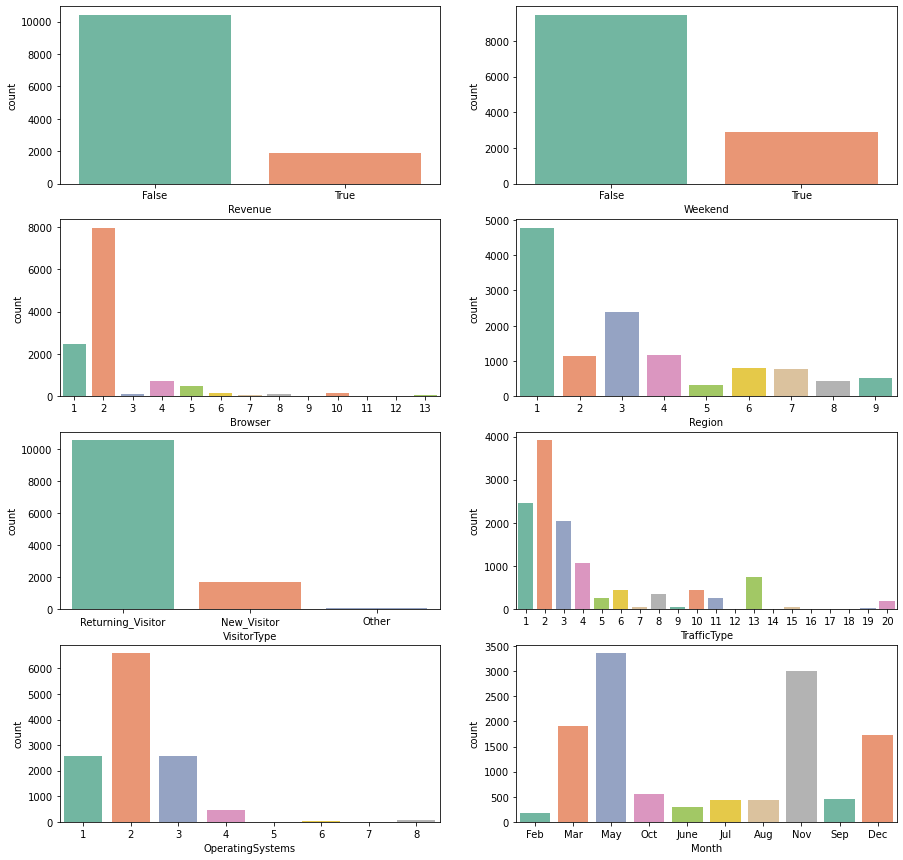

In [ ]:
#Freq Plots for Categorical Data
print('----Categorical Data---- \n')

fig, ax = plt.subplots(4,2, figsize = (15,15))

sns.countplot(df['Revenue'], ax = ax[0,0], palette='Set2')
sns.countplot(df['Weekend'], ax = ax[0,1], palette='Set2')
sns.countplot(df['Browser'], ax = ax[1,0], palette='Set2')
sns.countplot(df['Region'], ax = ax[1,1], palette='Set2')
sns.countplot(df['VisitorType'], ax = ax[2,0], palette='Set2')
sns.countplot(df['TrafficType'], ax = ax[2,1], palette='Set2')
sns.countplot(df['OperatingSystems'], ax = ax[3,0], palette='Set2')
sns.countplot(df['Month'], ax = ax[3,1], palette='Set2')
fig.show()

rev_counts = df['Revenue'].value_counts()
false_percent = round(rev_counts[0]/sum(rev_counts)*100,3)
print('% of False counts in dataset is', false_percent,'%')


counts = df['Weekend'].value_counts()
percent = round(counts[0]/sum(counts)*100,3)
print('% of Not Weekend counts in dataset is', percent,'%')

counts = df['VisitorType'].value_counts()
percent = round(counts[0]/sum(counts)*100,3)
print('% of Returning Visitor count in dataset is', percent,'%')

Dataset is imbalanced, with 85% not revenue and 15% revenue. Balancing the dataset to train models should be done.

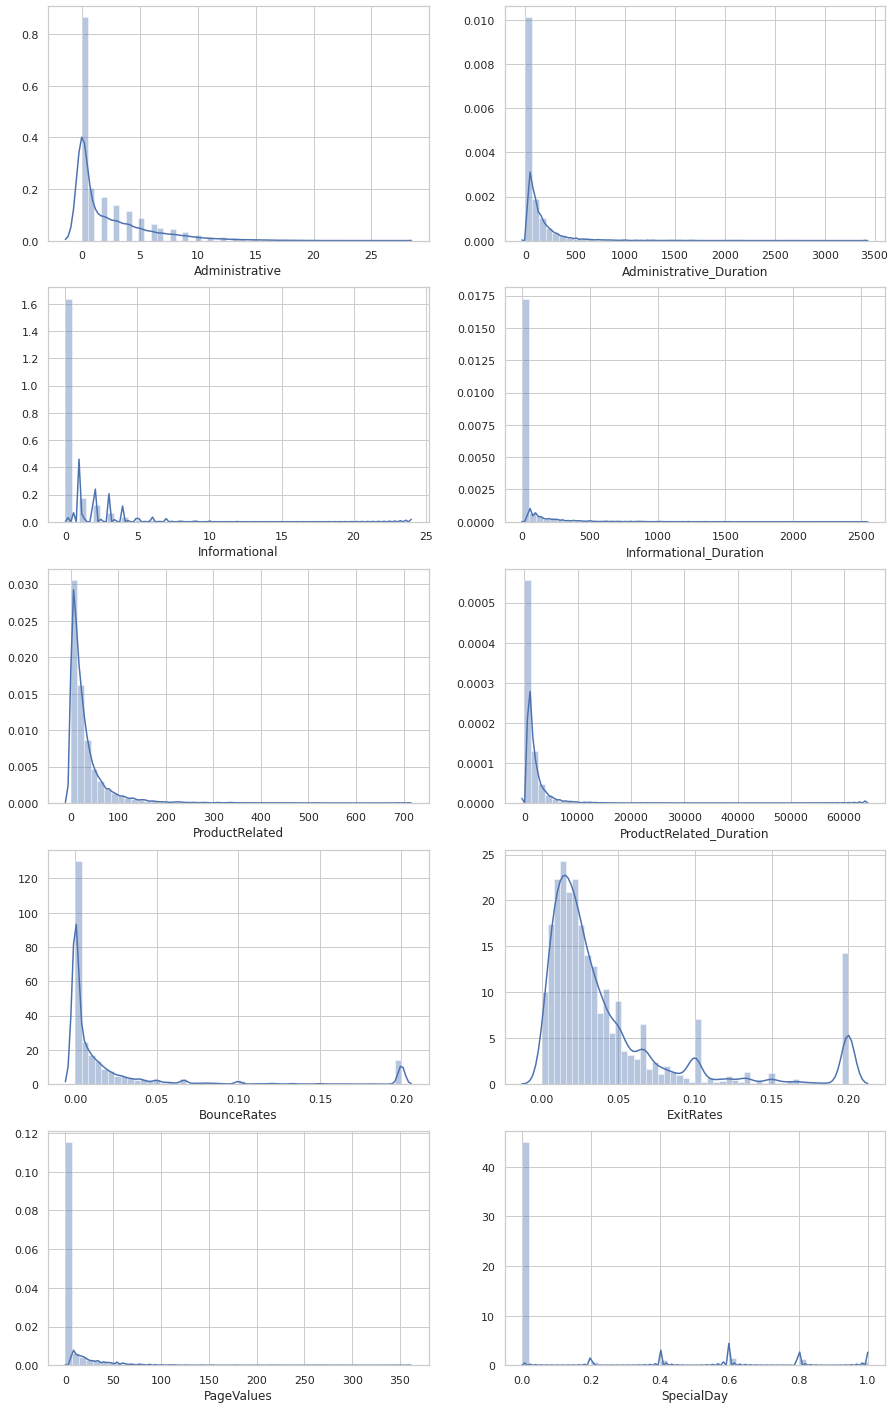

In [ ]:
#This cell works in colab, but not in jupyter...
#Distribution plots for Numerical Data
import random

sns.set(style="whitegrid")

fig, ax = plt.subplots(5,2, figsize = (15,25))

num_features = ['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

ax1 = 0
ax2 = 0
#palette= ['Set1','Set2','Set3']
#Plot
for feat in num_features:
  #sns.violinplot(df[feat], ax = ax[ax1,ax2], palette = random.choice(palette))
  sns.distplot(df[feat], ax = ax[ax1,ax2])
  ax2 += 1
  if ax2 > 1:
    ax2 = 0
    ax1 += 1

fig.show()

All of the numerical data seems skewed, so data transformation is necessary.

##Cleaning and Transforming Dataset

In [ ]:
#Drop NaN
print('# of NaN in dataset: ',df.isnull().sum().sum())
df = df.dropna() 

# of NaN in dataset:  112


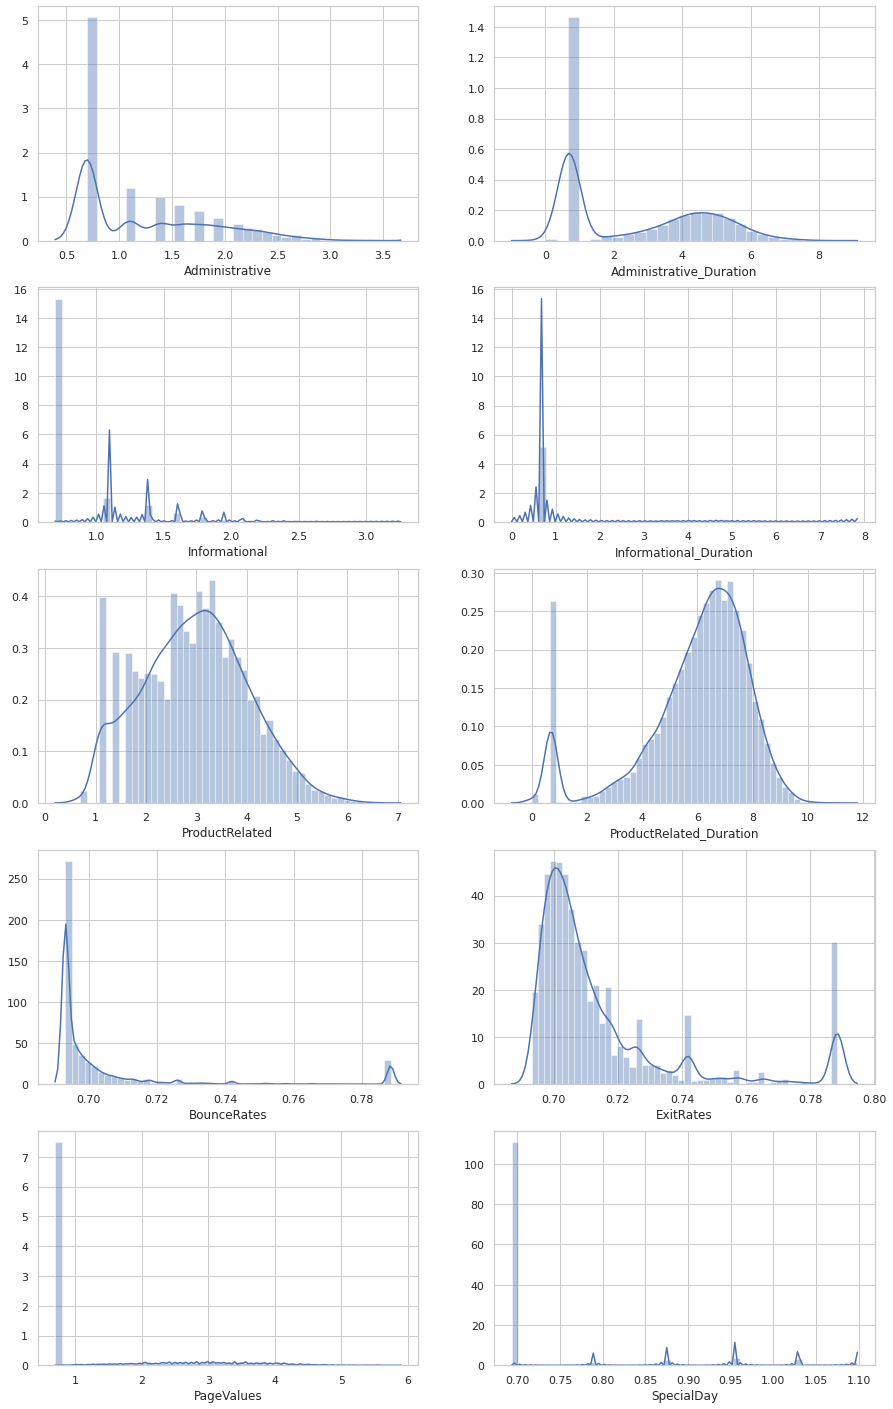

In [ ]:
from sklearn import preprocessing as prep

#Numerical Features

#Log transform 
num_features = ['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
for feat in num_features:
  #add constant
  df[feat] = df[feat] + 2
  df[feat] = np.log(df[feat])


'''
#Quantile Transformation
Quant_Transformer = prep.QuantileTransformer(n_quantiles=11, random_state=0, output_distribution = 'uniform')

for feat in num_features:
  df_feat = df[feat].values.reshape(-1,1)
  df[feat] = Quant_Transformer.fit_transform(df_feat)

'''
'''
#Binning/discretizing
for feat in num_features:
  df_feat = df[feat].values.reshape(-1,1)
  df[feat] = pd.qcut(df_feat[:,0], 10, labels=False)

'''
#Graph
fig, ax = plt.subplots(5,2, figsize = (15,25))

ax1 = 0
ax2 = 0

for feat in num_features:
  sns.distplot(df[feat], ax = ax[ax1,ax2])
  ax2 += 1
  if ax2 > 1:
    ax2 = 0
    ax1 += 1

fig.show()

There is still some skewness present, but that is generally due to having modes in the dataset, where the highest percentage of values may be in the higher or lower end. Overall, log transformation appears to be satisfactory, especially when looking at the transformed ProductRelated which looks to have an almost normal distribution.

In [ ]:
#Drop "Other" in VisitorType

print(set(df['VisitorType'].values))
df = df[df['VisitorType'] != 'Other']
print(set(df['VisitorType'].values))

{'Returning_Visitor', 'New_Visitor', 'Other'}
{'Returning_Visitor', 'New_Visitor'}


In [ ]:
df['Weekend'] = df['Weekend']*1
df['Revenue'] = df['Revenue']*1
dummies_Month_train = pd.get_dummies(df['Month'], prefix='Month')
dummies_VisitorType_train = pd.get_dummies(df['VisitorType'], prefix='VisitorType')
dummies_Region_train = pd.get_dummies(df['Region'], prefix='Region')
dummies_OS_train = pd.get_dummies(df['OperatingSystems'], prefix='OperatingSystem')
dummies_Browser_train = pd.get_dummies(df['Browser'], prefix='Browser')
dummies_Traffic_train = pd.get_dummies(df['TrafficType'], prefix='TrafficType')

dfClean = pd.concat([df, dummies_Month_train, dummies_VisitorType_train, dummies_Region_train, dummies_OS_train, dummies_Browser_train, dummies_Traffic_train], axis=1)
dfClean = dfClean.drop(['Month','VisitorType','Region','OperatingSystems','Browser','TrafficType'], axis=1)
print('# of NaN in dataset: ',df.isnull().sum().sum())
dfClean = dfClean.dropna() 
print('\nDimensions of Dataset:', dfClean.shape,)
print('\n---Cleaned dataset---')
dfClean.isna().sum() 

# of NaN in dataset:  0

Dimensions of Dataset: (12231, 74)

---Cleaned dataset---


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
                          ..
TrafficType_16             0
TrafficType_17             0
TrafficType_18             0
TrafficType_19             0
TrafficType_20             0
Length: 74, dtype: int64

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.693147,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.693147,0.693147,0.693147,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.693147,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.693147,0.000000,0.693147,0.000000,1.098612,0.000000,0.788457,0.788457,0.693147,0.693147,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.693147,0.693147,0.693147,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.693147,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.693147,0.693147,0.693147,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.693147,Feb,3,3,1,4,Returning_Visitor,1,0


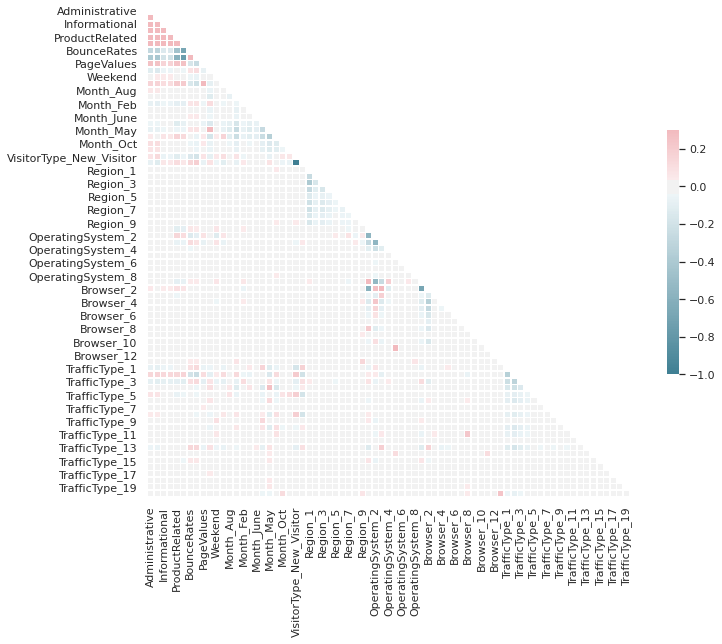

In [ ]:
corr = dfClean.corr(method ='pearson')

# Using only the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create the figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
covarSort = corr.sort_values(by=['Revenue'], ascending=False).index
datsorted = corr.loc[:, covarSort]
datsorted.corr()

,Revenue,PageValues,ProductRelated_Duration,ProductRelated,Administrative_Duration,Administrative,Month_Nov,TrafficType_2,Informational_Duration,Informational,VisitorType_New_Visitor,OperatingSystem_2,TrafficType_8,Month_Oct,Weekend,TrafficType_20,TrafficType_10,TrafficType_5,TrafficType_7,Month_Sep,Region_1,Browser_5,Browser_4,TrafficType_11,Browser_10,OperatingSystem_4,Browser_12,Month_Aug,Region_2,TrafficType_16,Browser_13,Region_5,Region_7,Browser_11,OperatingSystem_5,Region_9,Browser_8,TrafficType_14,TrafficType_4,OperatingSystem_7,Month_Jul,Browser_2,TrafficType_17,Browser_9,TrafficType_12,OperatingSystem_8,Region_4,OperatingSystem_6,Browser_7,Browser_1,TrafficType_9,TrafficType_19,OperatingSystem_1,Region_6,Region_3,TrafficType_18,Browser_6,Region_8,TrafficType_6,Month_June,TrafficType_15,Browser_3,Month_Dec,Month_Feb,Month_Mar,TrafficType_1,TrafficType_13,OperatingSystem_3,Month_May,TrafficType_3,SpecialDay,VisitorType_Returning_Visitor,BounceRates,ExitRates
Revenue,1.000000,0.905099,0.505545,0.496498,0.473981,0.466560,0.341951,0.389399,0.352706,0.344555,0.250639,0.168540,0.143512,0.125050,0.082827,0.024210,0.051567,0.068760,0.048152,0.077651,0.044691,0.026631,0.039748,-0.001869,0.024395,0.027956,-0.011275,0.038648,0.009287,-0.008051,-0.035644,0.014807,0.009268,-0.033298,-0.033298,0.004543,-0.047358,-0.018587,-0.008183,-0.035517,-0.021379,0.043532,-0.041424,-0.029835,-0.036301,-0.046818,-0.018747,-0.030466,-0.028115,-0.039751,-0.056202,-0.050785,-0.043473,-0.047998,-0.019703,-0.056854,-0.038269,-0.039936,-0.061455,-0.081838,-0.107737,-0.109738,-0.014800,-0.197329,-0.142494,-0.192821,-0.206648,-0.185062,-0.206122,-0.263825,-0.277636,-0.250639,-0.481812,-0.527737
PageValues,0.905099,1.000000,0.592917,0.589346,0.584306,0.581289,0.229599,0.391760,0.445286,0.434233,0.196438,0.200877,0.088739,0.148057,0.065072,0.008692,0.019786,0.056030,0.061935,0.089482,0.016828,0.029151,0.042320,-0.042698,0.024678,0.035413,-0.033772,0.046313,0.019757,-0.024211,-0.042707,0.039513,0.016516,-0.041674,-0.041674,-0.002654,-0.078569,-0.012756,0.054123,-0.048657,-0.024362,0.069738,-0.045436,-0.031250,-0.040390,-0.079531,-0.007846,-0.012890,-0.023925,-0.067793,-0.064597,-0.047624,-0.078858,-0.049096,-0.004805,-0.056940,-0.017366,-0.045624,-0.033908,-0.082332,-0.116127,-0.113568,0.003611,-0.214685,-0.149721,-0.185581,-0.198080,-0.187629,-0.123739,-0.278596,-0.244379,-0.196438,-0.542418,-0.594561
ProductRelated_Duration,0.505545,0.592917,1.000000,0.978812,0.759010,0.763944,0.282366,0.439908,0.638124,0.631558,0.045749,0.251471,0.026500,0.112868,0.100229,-0.069092,0.044328,-0.038883,0.031693,0.087811,0.014375,0.006814,0.008807,-0.047440,0.021949,0.035053,-0.020712,0.067855,0.007433,-0.004330,-0.107826,0.015802,0.032293,-0.025206,-0.025206,-0.038015,-0.112225,0.018675,0.042523,-0.037360,-0.006409,0.173785,-0.042282,-0.010753,-0.041176,-0.097331,-0.016147,-0.037135,-0.024815,-0.158626,-0.077786,-0.025647,-0.171523,-0.042952,0.007983,-0.047798,-0.006962,-0.006843,-0.022735,-0.082526,-0.145203,-0.113546,0.010875,-0.264991,-0.156514,-0.160890,-0.167392,-0.143558,-0.158485,-0.315810,-0.210455,-0.045749,-0.912927,-0.937787
ProductRelated,0.496498,0.589346,0.978812,1.000000,0.775544,0.792802,0.310139,0.416105,0.690549,0.686929,-0.031813,0.269677,-0.011400,0.105390,0.080080,-0.075966,0.035472,-0.069449,0.022173,0.078205,0.025288,0.001326,-0.003809,-0.059747,0.019883,0.021311,-0.030362,0.073840,0.006781,-0.011064,-0.109429,0.009793,0.033045,-0.042793,-0.042793,-0.048845,-0.125716,0.009900,0.039181,-0.042736,0.007489,0.209182,-0.047863,-0.021741,-0.045659,-0.101959,-0.018097,-0.041583,-0.029773,-0.183037,-0.095249,-0.029301,-0.195581,-0.046945,0.011170,-0.049817,-0.009299,-0.022910,-0.024125,-0.059798,-0.140414,-0.137202,-0.011060,-0.271163,-0.192971,-0.129441,-0.118894,-0.132452,-0.148323,-0.302800,-0.193617,0.031813,-0.826175,-0.868349
Administrative_Duration,0.473981,0.584306,0.759010,0.775544,1.000000,0.993972,0.198658,0.465539,0.683173,0.681703,0.240441,0.0

Looking at correlations in the dataset through pearson correlation, we can get a rough idea of what may be good indicators for the target output: e.g. for Revenue, PageValues, ProductRelated, Adminstrative, and Month_Nov are positively correlated and BounceRates, ExitRates, and Returning Visitor are negatively correlated.

In [ ]:
#from pandas.plotting import scatter_matrix
#pd.plotting.scatter_matrix(dfClean, alpha=0.2, diagonal = 'kde');

##Unsupervised Learning

###PCA

In [ ]:
#Standardize data
df_scaled = StandardScaler().fit_transform(dfClean)

#Perform PCA
pca = PCA(n_components = 2, svd_solver= 'full')
PC = pca.fit_transform(df_scaled)

In [ ]:
scores_pd = pd.DataFrame(data = PC
                         ,columns = ['PC1', 'PC2']
                         ,index = dfClean.index)

In [ ]:
scores_pd

,PC1,PC2
0,-6.163726,2.676465
1,-2.263646,-0.749589
2,-6.496638,2.269040
3,-4.025199,-0.902838
4,-2.151417,0.339213
...,...,...
12325,1.141187,0.824145
12326,-0.724513,-0.090783
12327,-2.308726,-1.331913
12328,0.621042,-0.977301


In [ ]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = dfClean.columns)

In [ ]:
loadings_pd

,PC1,PC2
Administrative,0.319592,0.042279
Administrative_Duration,0.320097,0.062320
Informational,0.243457,-0.002605
Informational_Duration,0.245800,-0.007188
ProductRelated,0.351210,-0.072241
...,...,...
TrafficType_16,0.002776,-0.006771
TrafficType_17,-0.007546,0.010235
TrafficType_18,-0.006736,-0.016489
TrafficType_19,-0.006544,-0.011985


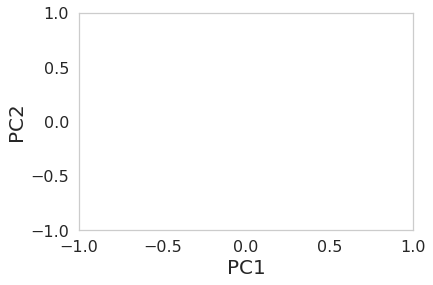

In [ ]:
def myplot(score,coeff,loading_labels=None,score_labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xf = xs * scalex
    yf = ys * scaley
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xf, yf)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*1.4, coeff[i,1]*1.4,color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, loading_labels[i], color = 'r', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize=20);
plt.ylabel("PC{}".format(2), fontsize=20);
plt.tick_params(labelsize=16)
plt.grid()

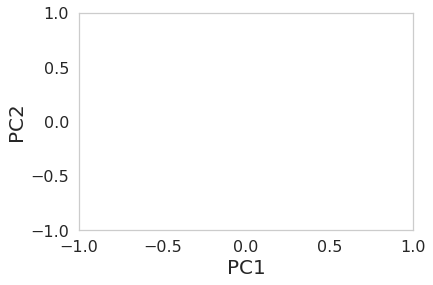

In [ ]:
def loadings(coeff,loading_labels=None,score_labels=None):  
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2.4, coeff[i,1]*2.4,color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 2.5, coeff[i,1] * 2.5, loading_labels[i], color = 'r', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize=20);
plt.ylabel("PC{}".format(2), fontsize=20);
plt.tick_params(labelsize=16)
plt.grid()



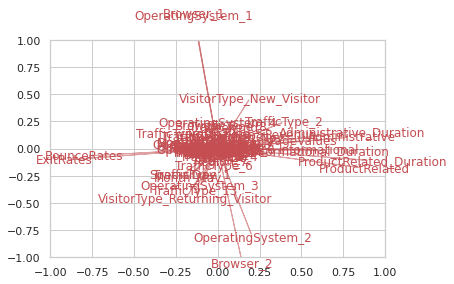

In [ ]:
loadings(np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

the following appear highly correlated
>- BounceRates, ExitRates
>- Browser 1, OperatingSystem1
>- Browser 2, OperatingSystem2
>- Administrative, Administrative Duration, (PageValues has same direction, but not magnitude)
>- Informational, Informational_Duration
>- ProductRelated, ProductRelated_Duration





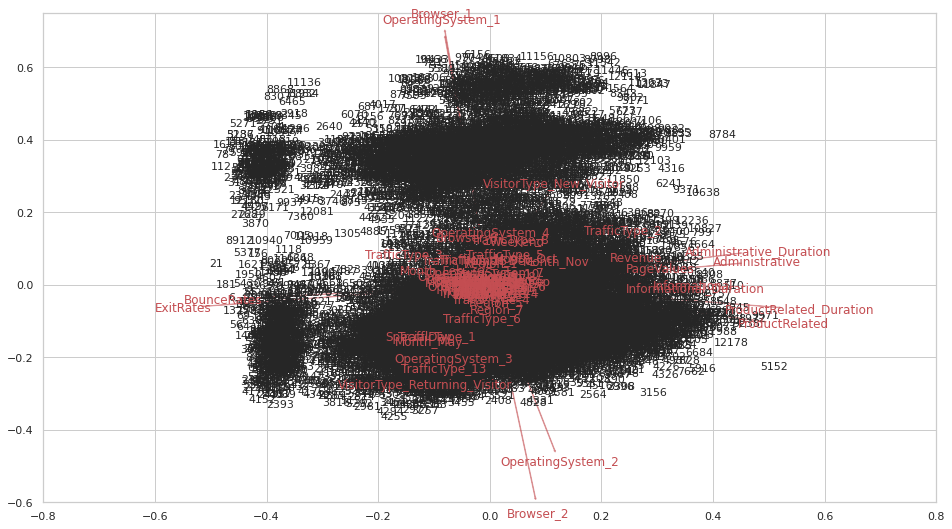

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

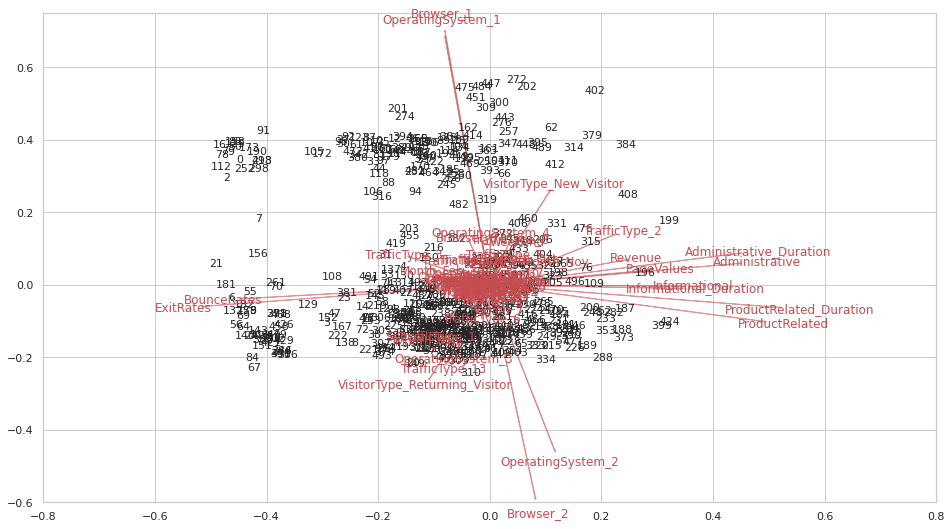

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index[:500])
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

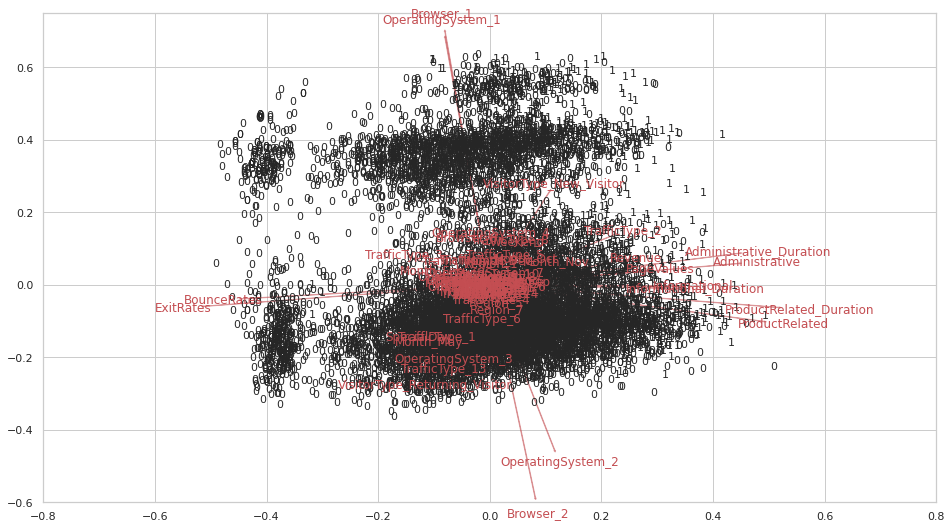

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=df.Revenue)
plt.xlim(-0.8,0.8)
plt.ylim(-0.6,0.75)
plt.show()

In the dataset, we can see some outliers and even some groups forming. For example, we see a lone 0 to the lower right: this is because this had a high outlier value for "ProductRelated" and/or "ProductRelated_Duration" which we saw in our EDA. We also see a lone 1 to the upper right, where it similarly had a high value for "Administrative". 

This dataset projected in PCA also appears to be horizontally bisected: looking at the loadings, we see the upper half following "Browser1"/"OperatingSystem_1" and the lower half follows "Browser2"/"OperatingSystem_2"; knowing the two most popular Operating systems, we could assume that these refer to Windows or Mac computers. 

To the left of the dataset following "BounceRates"/"ExitRates", we see two pockets. These are most likely bisected according to the Windows/Mac explaination from the previous paragraph, and they are at the farthest reaches because as we see in our EDA, a large section of the data were desginated the highest value in the distribution.

In [ ]:
#PCA diagnostics
pca.explained_variance_

array([4.74711541, 2.99261603])

In [ ]:
pca.explained_variance_ratio_

array([0.06414496, 0.04043745])

In [ ]:
#Run more components
pca10 = PCA(n_components=50, svd_solver='full')
pca10.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

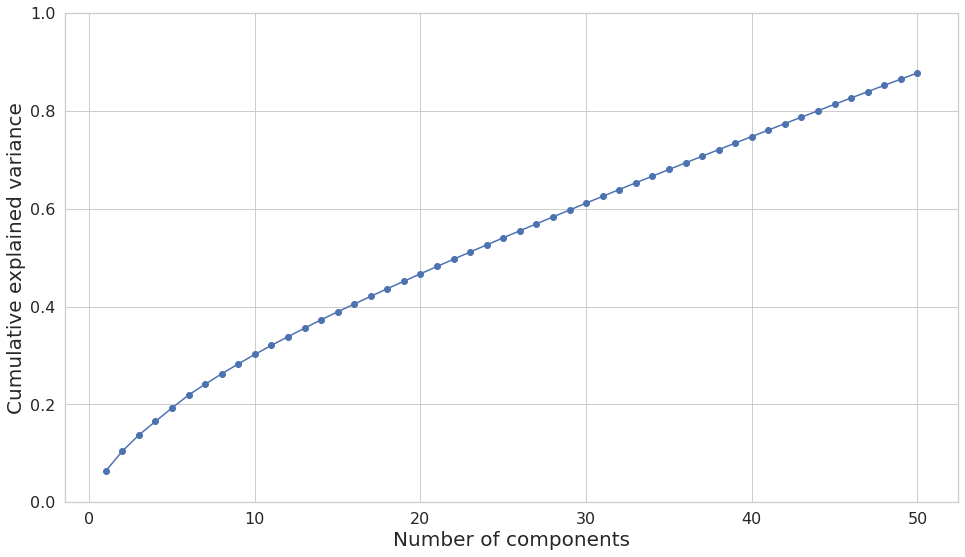

In [ ]:
plt.plot(range(1,pca10.n_components+1), np.cumsum(pca10.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

Looking at the cumulative explained variance, adding components creates a linear relationship in improving our performance. However, since we start with low explained variance, we would have to use many components to achieve good cumulative explained variance, so for our dataset, PCA does not help us reduce dimensionality. The poor performance of PCA may be due to our dataset being mostly one-hot encoded variables (63 variables), not numerical variables(10 variables). Sparsity of the dataset does not work well with PCA. For the rest of methods, we will use all of our features.

###K-means

In [ ]:
trainDF = dfClean.sample(frac=0.75,random_state=512) #Separating the data into test and train data
test = dfClean.drop(trainDF.index)
testX = test.drop(['Revenue'],axis=1)
testY = test['Revenue']

X = trainDF.drop(['Revenue'],axis=1)
y = trainDF['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3) #this is specifically for the train data

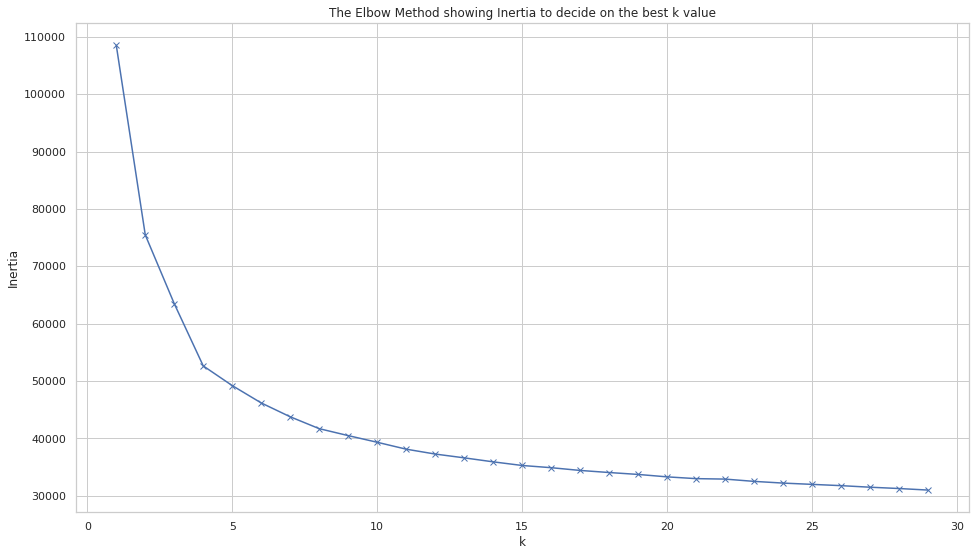

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler, StandardScaler 

# k means iteratively to determine k
inertia = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    inertia.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing Inertia to decide on the best k value')
plt.show()

When trying the K-means elbow method to cluster our datapoints, there appears to be an elbow at K=4.

In [ ]:
Best_kmeanModel = KMeans(n_clusters=4).fit(X_train)

In [ ]:
centroids_best_kmeanModel = pd.DataFrame(data=Best_kmeanModel.cluster_centers_, columns=X.columns)

In [ ]:
# Instantiate
pca = PCA(n_components=2)
pca.fit(centroids_best_kmeanModel)

# Transform the data using the PCA fit
PC_scores = pca.transform(centroids_best_kmeanModel)

# Create a DataFrame for the reduced data
scores_pd = pd.DataFrame(PC_scores
                         ,columns = ['Dimension 1', 'Dimension 2'])

In [ ]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = centroids_best_kmeanModel.columns)

In [ ]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    if score_labels is None:
        plt.scatter(scores[:,0],scores[:,1])
    else:
        for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
            plt.text(x, y, label, ha='center', size=16)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

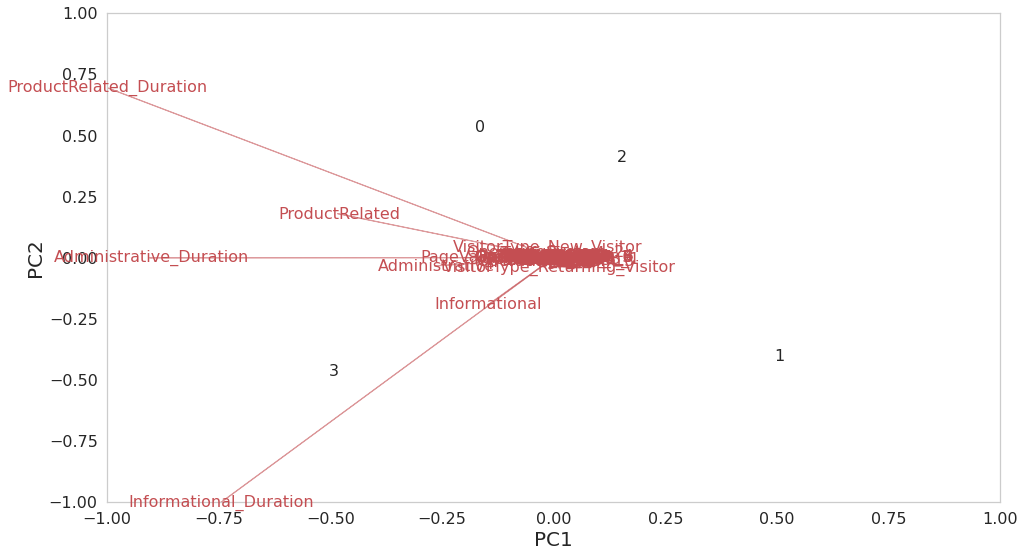

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]

myplot(PC_scores,loadings_pd,loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

In [ ]:
clusters = pd.DataFrame({'Cluster': Best_kmeanModel.labels_})
clusters['Index'] = clusters.index

print(clusters.groupby(['Cluster'])['Index'].count())

#clusters_counts = clusters.groupby("0").count()
#clusters_counts
#clusters.groupby('0')['Count'].count()
#labels.groupby(['labels']).count()

Cluster
0    2138
1     826
2    2446
3    1011
Name: Index, dtype: int64


In [ ]:
log_data_scores = pca.transform(X_train)

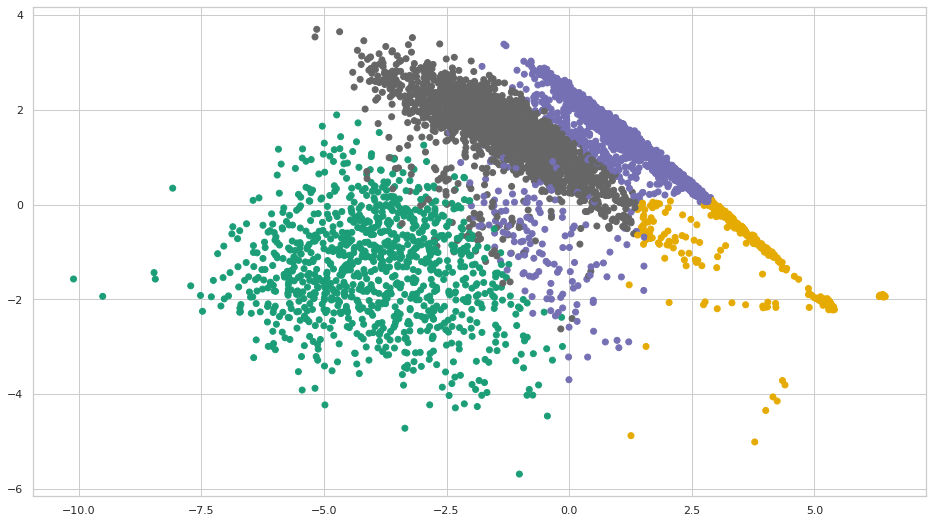

In [ ]:
plt.scatter(log_data_scores[:,0], log_data_scores[:,1], c=clusters['Cluster'], cmap="Dark2_r")
plt.show()

For plotting our K-means clustering, we used PCA to reduce the dimensionality and easier visualization in 2-D. We have 4 major clusters present but there appears to be other cluster shapes which could be more likely (one drawback of K-means is that it looks like groupings in a circular fashion, equidistant from the center). Because our PCA cumulative variance explained is poor in n=2 components, the distinction is not clean is 2-D, but may be more apparent in higher dimensionality. Moreover, it is interesting that there is such a large distribution of datapoints towards to right side of the graph despite our loadings showing that most vectors are short and concentrated towards the center.

##Supervised Learning

In [ ]:
trainDF = dfClean.sample(frac=0.75,random_state=512) #Separating the data into test and train data
test = dfClean.drop(trainDF.index)
testX = test.drop(['Revenue'],axis=1)
testY = test['Revenue']

X = trainDF.drop(['Revenue'],axis=1)
y = trainDF['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3) #this is specifically for the train data

In [ ]:
#Imbalanced Dataset, under sampling to fix
def balancedata(X_train, y_train):
  #combine them back for resampling
  train_data = pd.concat([X_train, y_train], axis=1)
  # separate minority and majority classes
  negative = train_data[train_data.Revenue==0]
  positive = train_data[train_data.Revenue==1]

  # downsample majority
  neg_downsampled = resample(negative,
  replace=True, # sample with replacement
  n_samples=len(positive), # match number in minority class
  random_state=27) # reproducible results
  # combine minority and downsampled majority
  downsampled = pd.concat([positive, neg_downsampled])
  # check new class counts
  print(downsampled.Revenue.value_counts())
  # create 
  X_train_balanced = downsampled.drop(['Revenue'],axis=1)
  y_train_balanced = downsampled['Revenue']
  return X_train_balanced, y_train_balanced
X_train_balanced, y_train_balanced = balancedata(X_train, y_train)



1    1006
0    1006
Name: Revenue, dtype: int64


In [ ]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

###Logistic Regression

In [ ]:
model = LogisticRegression()    
model.fit(X_train_balanced, y_train_balanced)

predictions = model.predict(X_test)

#Accuracy     
ACC = np.trace(confusion_matrix(y_test, predictions))/confusion_matrix(y_test, predictions).sum()
print(ACC)

0.873546511627907


In [ ]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0
percentageArray = np.zeros((2,2))

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    percentageArray += confusion_matrix(y_test, predictions)
    print(confusion_matrix(y_test, predictions))
    ACC = np.trace(confusion_matrix(y_test, predictions))/confusion_matrix(y_test, predictions).sum() 
    # Because the confusion matrix is 18 x 18, this is a much easier way to calculate accuracy then looking at TN, FN, TP, and FP
    accuracy[np_idx] = ACC*100
    np_idx += 1

    print("f1 score is:", round(f1_score(y_test, predictions, average="macro"), 3))
    print("Precision score is:", round(precision_score(y_test, predictions, average="macro"), 3))
    print("Recall score is:", round(recall_score(y_test, predictions, average="macro"),3))  
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3))) 

[[738  35]
 [ 67  78]]
f1 score is: 0.77
Precision score is: 0.804
Recall score is: 0.746
Fold 1: Accuracy: 88.889%
[[739  35]
 [ 68  76]]
f1 score is: 0.765
Precision score is: 0.8
Recall score is: 0.741
Fold 2: Accuracy: 88.78%
[[728  33]
 [ 67  90]]
f1 score is: 0.789
Precision score is: 0.824
Recall score is: 0.765
Fold 3: Accuracy: 89.107%
[[748  27]
 [ 58  84]]
f1 score is: 0.805
Precision score is: 0.842
Recall score is: 0.778
Fold 4: Accuracy: 90.731%
[[762  32]
 [ 69  54]]
f1 score is: 0.727
Precision score is: 0.772
Recall score is: 0.699
Fold 5: Accuracy: 88.986%
[[763  30]
 [ 56  68]]
f1 score is: 0.78
Precision score is: 0.813
Recall score is: 0.755
Fold 6: Accuracy: 90.622%
[[734  33]
 [ 70  80]]
f1 score is: 0.771
Precision score is: 0.81
Recall score is: 0.745
Fold 7: Accuracy: 88.768%
[[741  20]
 [ 76  80]]
f1 score is: 0.782
Precision score is: 0.853
Recall score is: 0.743
Fold 8: Accuracy: 89.531%
[[740  34]
 [ 58  85]]
f1 score is: 0.795
Precision score is: 0.821
Re

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

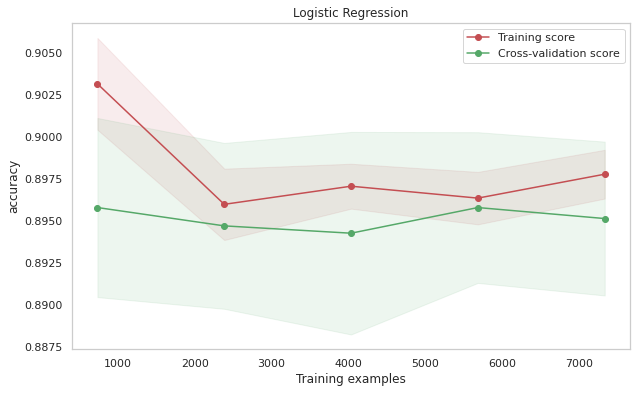

In [ ]:
plot_learning_curve(model,'Logistic Regression', X, y, cv=5)

In [ ]:
# Calculate the absolute error
log_reg_errors = abs(model.predict(X_test) - y_test)
print('Test Set Mean Absolute Error:', round(np.mean(log_reg_errors), 2))

Test Set Mean Absolute Error: 0.09


####L2 Regularization and Finetuning

In [ ]:
def hyperparameter(X_train, X_test, y_train, y_test, reg,C):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    result_f1 = []

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    solver='lbfgs'
    if reg == 'l1':
      solver = 'saga'

    best_score = 0

    for param in C:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        # train a logistic regression classifier
        clf = LogisticRegression(penalty=reg,C=param, solver=solver).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        train_f1score = f1_score(y_train, y_train_predict, average="macro")
        test_f1score = f1_score(y_test, y_test_predict, average="macro")
        #print("Precision score is:", round(precision_score(y_test, predictions, average="macro"), 3))
        #print("Recall score is:", round(recall_score(y_test, predictions, average="macro"),3))  
        
        #Store best model
        if test_f1score > best_score:
          best_score = test_f1score
          best_model = clf 
          best_param = param

        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        result_f1.append((param, train_f1score, test_f1score))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    resultf1_df = pd.DataFrame(result_f1, columns=["param", "train_f1score", "test_f1score"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df, resultf1_df,best_param, best_model

Best parameter for best f1 score is  0.07847599703514611


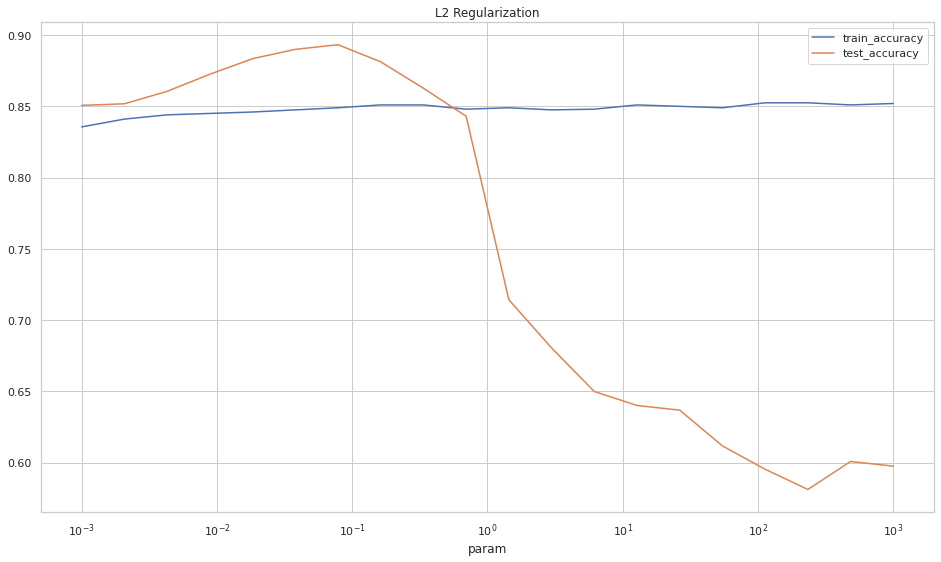

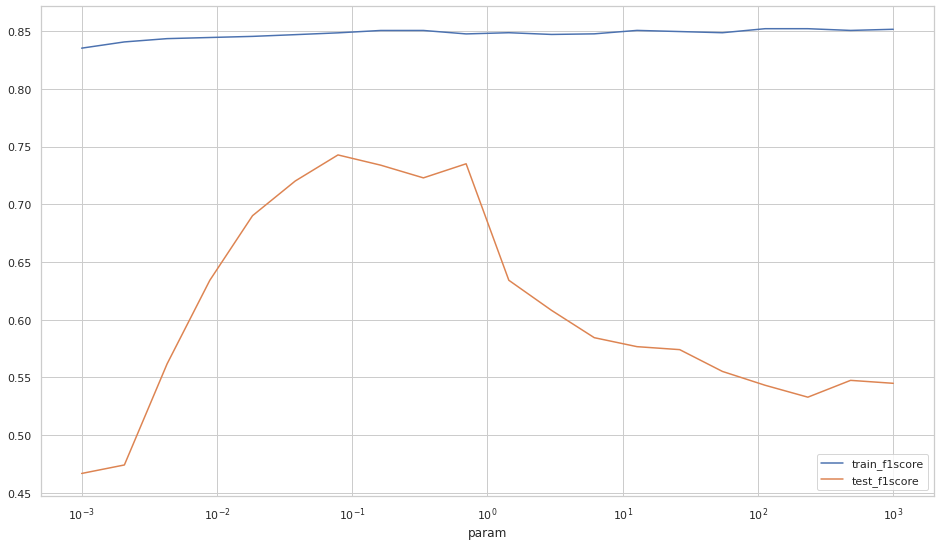

In [ ]:
C = np.logspace(-3,3, num = 20)
#C= [0.001, 0.01, 0.1, 1, 10, 100, 1000]
paraml2_df, paraml2f1_df, best_paraml2, best_logregl2 = hyperparameter(X_train_balanced, X_test, y_train_balanced, y_test,'l2',C)
paraml2_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True, title = "L2 Regularization")
paraml2f1_df.plot(x="param", y=["train_f1score", "test_f1score"], logx=True)
print("Best parameter for best f1 score is ",best_paraml2)

In [ ]:
#X_train_balanced, y_train_balanced = balancedata(X_train, y_train)

In [ ]:
def logregCVScore(model):
  scaler = StandardScaler()
  kfold = KFold(n_splits=10)
  kfold.get_n_splits(X)

  accuracy = np.zeros(10)
  np_idx = 0
  percentageArray = np.zeros((2,2))

  for train_idx, test_idx in kfold.split(X):
      X_train, X_test = X.values[train_idx], X.values[test_idx]
      y_train, y_test = y.values[train_idx], y.values[test_idx]
      
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)
      
      model.fit(X_train, y_train)
      
      predictions = model.predict(X_test)
      
      percentageArray += confusion_matrix(y_test, predictions)
      print(confusion_matrix(y_test, predictions))
      ACC = np.trace(confusion_matrix(y_test, predictions))/confusion_matrix(y_test, predictions).sum() 
      # Because the confusion matrix is 18 x 18, this is a much easier way to calculate accuracy then looking at TN, FN, TP, and FP
      accuracy[np_idx] = ACC*100
      np_idx += 1

      print("f1 score is:", round(f1_score(y_test, predictions, average="macro"), 3))
      print("Precision score is:", round(precision_score(y_test, predictions, average="macro"), 3))
      print("Recall score is:", round(recall_score(y_test, predictions, average="macro"),3))  
      
      print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3))) 

In [ ]:
logregCVScore(best_logregl2)

[[740  33]
 [ 67  78]]
f1 score is: 0.773
Precision score is: 0.81
Recall score is: 0.748
Fold 1: Accuracy: 89.107%
[[739  35]
 [ 68  76]]
f1 score is: 0.765
Precision score is: 0.8
Recall score is: 0.741
Fold 2: Accuracy: 88.78%
[[728  33]
 [ 67  90]]
f1 score is: 0.789
Precision score is: 0.824
Recall score is: 0.765
Fold 3: Accuracy: 89.107%
[[749  26]
 [ 59  83]]
f1 score is: 0.804
Precision score is: 0.844
Recall score is: 0.775
Fold 4: Accuracy: 90.731%
[[763  31]
 [ 70  53]]
f1 score is: 0.725
Precision score is: 0.773
Recall score is: 0.696
Fold 5: Accuracy: 88.986%
[[763  30]
 [ 56  68]]
f1 score is: 0.78
Precision score is: 0.813
Recall score is: 0.755
Fold 6: Accuracy: 90.622%
[[734  33]
 [ 71  79]]
f1 score is: 0.768
Precision score is: 0.809
Recall score is: 0.742
Fold 7: Accuracy: 88.659%
[[741  20]
 [ 76  80]]
f1 score is: 0.782
Precision score is: 0.853
Recall score is: 0.743
Fold 8: Accuracy: 89.531%
[[740  34]
 [ 60  83]]
f1 score is: 0.789
Precision score is: 0.817
R

f1 score is: 0.811

Precision score is: 0.847

Recall score is: 0.784

Fold 10: Accuracy: 91.167%

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

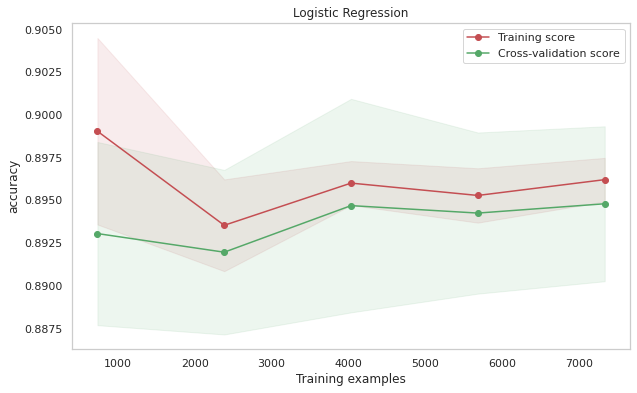

In [ ]:
plot_learning_curve(best_logregl2,'Logistic Regression', X, y, cv=5)

In [ ]:
"""
def hyperparameter(X_train, X_test, y_train, y_test, X,y,reg,C):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    solver='lbfgs'
    if reg == 'l1':
      solver = 'saga'

    for param in C:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        # train a logistic regression classifier
        clf = LogisticRegression(penalty=reg,C=param,solver=solver).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

#C = np.logspace(-3,3)
C= [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_df = hyperparameter(X_train, X_test, y_train, y_test, X,y,'l2',C)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

"""    



'\ndef hyperparameter(X_train, X_test, y_train, y_test, X,y,reg,C):\n    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)\n    # where numFeatures is the number of words used as features\n    result_list = []\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n    solver=\'lbfgs\'\n    if reg == \'l1\':\n      solver = \'saga\'\n\n    for param in C:\n        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value\n        # ......\n        # train a logistic regression classifier\n        clf = LogisticRegression(penalty=reg,C=param,solver=solver).fit(X_train, y_train)\n\n        # predict on train and test set\n        y_train_predict = clf.predict(X_train)\n        y_test_predict = clf.predict(X_test)\n\n        # calculate train and test accuracy\n        train_accuracy = accuracy_score(y_train, y_train_predict)\n        test_accuracy = accuracy_score(y_test, 

L2 regularization, linear model

In [ ]:
def L2Reg(alphas):
  # Generate several possible values for the regularization strength alpha (i.e. 1/C)
  # Smaller values, stronger regularization, more coefficients will go to zero
  #alphas = [2, 1.8, 1.6, 1.4, 1.2, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.050, 0.025, 0.010]

  # You can also use: alphas = np.logspace(-2,0,10) to generate 10 logarithmically spaced points between 10^-2 and 10^0.

  # NonZeroCoeff_L2: the number of non-zero coefficients for all alphas
  # Model_Coeff_L2 : the values of all the coefficients for all alphas
  Train_Error_L2 = np.zeros(shape=(len(alphas),1))
  Test_Error_L2 = np.zeros(shape=(len(alphas),1))

  Model_Coeff_L2  = np.zeros(shape=(X.shape[1], len(alphas)))
  NonZeroCoeff_L2 = np.zeros(shape=(len(alphas),1))

  #Run Ridge Regression for alphas, where alpha = 1/C

  count = -1
  for alpha in alphas:
      count += 1
      # instantiate a logistic regression model, and fit with X and y
      model_L2 = linear_model.Ridge(alpha=alpha)
      # Fit the model
      model_L2.fit(X_train, y_train)
      Train_Error_L2[count,0] = np.mean(abs(model_L2.predict(X_train) - y_train))
      Test_Error_L2[count,0]  = np.mean(abs(model_L2.predict(X_test) - y_test))
      Model_Coeff_L2[:,count] = model_L2.coef_
      NonZeroCoeff_L2[count,0] = X.shape[1] - (model_L2.coef_ == 0).sum()

  plt.scatter(alphas, Test_Error_L2, label='Test')
  plt.scatter(alphas, Train_Error_L2, label='Train')
  plt.xlabel(r'$\alpha$')
  plt.ylabel('Error')
  plt.legend()
  plt.show()
  return NonZeroCoeff_L2, Test_Error_L2

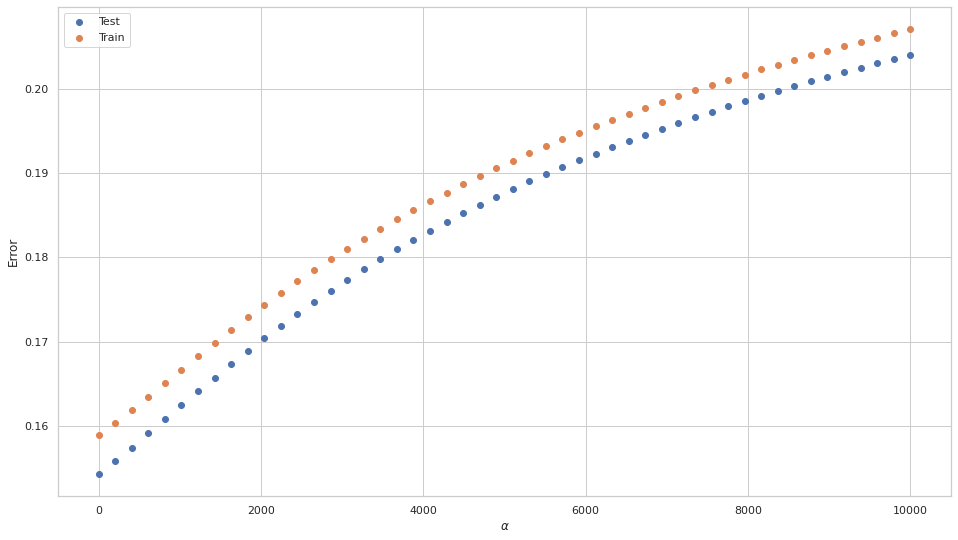

Test Set Mean Absolute Error: 0.15


In [ ]:
NonZeroCoeff_L2,Test_Error_L2 = L2Reg(alphas = np.linspace(0.01,10000))
print('Test Set Mean Absolute Error:', round(Test_Error_L2.min(),2))

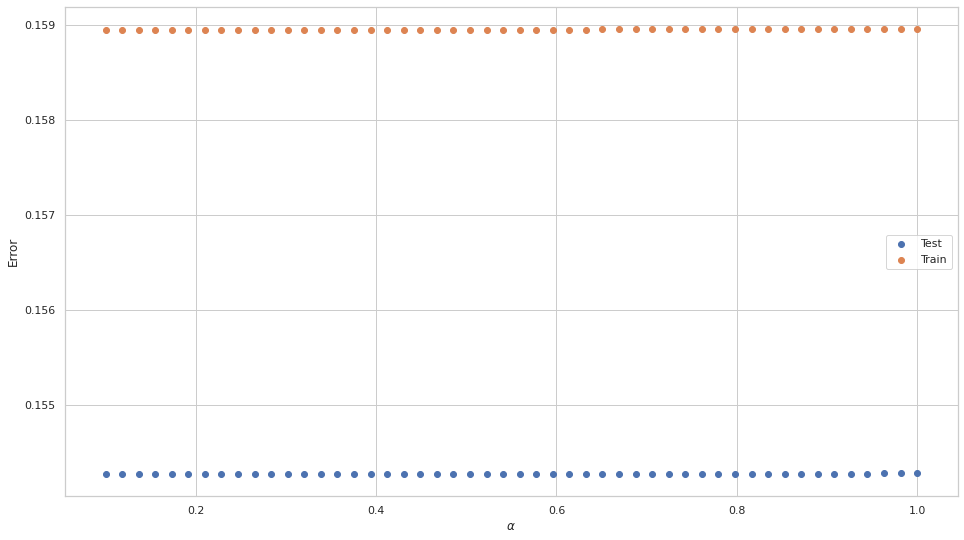

Test Set Mean Absolute Error: 0.15


In [ ]:
NonZeroCoeff_L2,Test_Error_L2 = L2Reg(alphas = np.linspace(0.1,1))
print('Test Set Mean Absolute Error:', round(Test_Error_L2.min(),2))

No handles with labels found to put in legend.


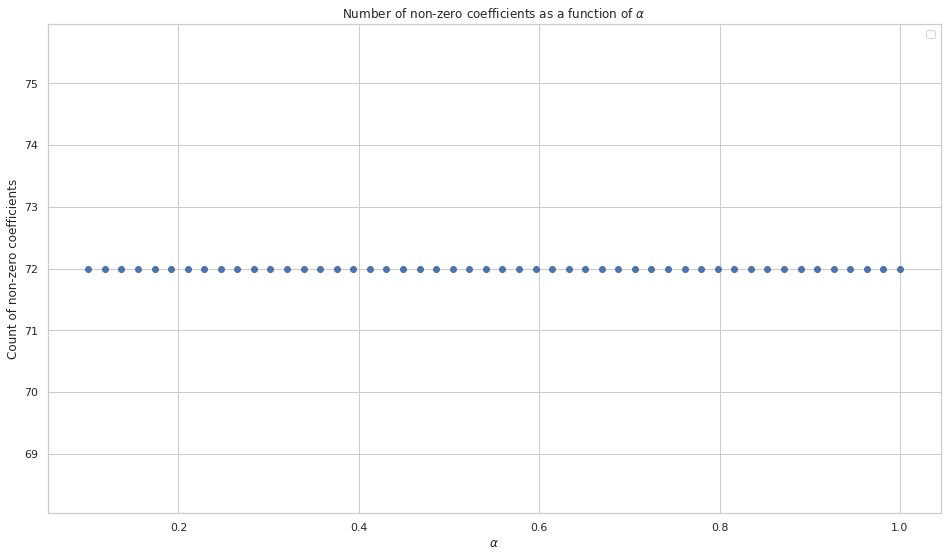

In [ ]:
#No variables go to zero
alphas = np.linspace(0.1,1)
plt.scatter(alphas, NonZeroCoeff_L2)
plt.legend()
plt.title(r'Number of non-zero coefficients as a function of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Count of non-zero coefficients')
plt.show()

Applying linear regression, increasing the hyperparameter seems to worsen the model performance. Moreover, none of the coefficients are forced to zero.

####L1 Regularization

Best parameter for best f1 score is  0.3359818286283781


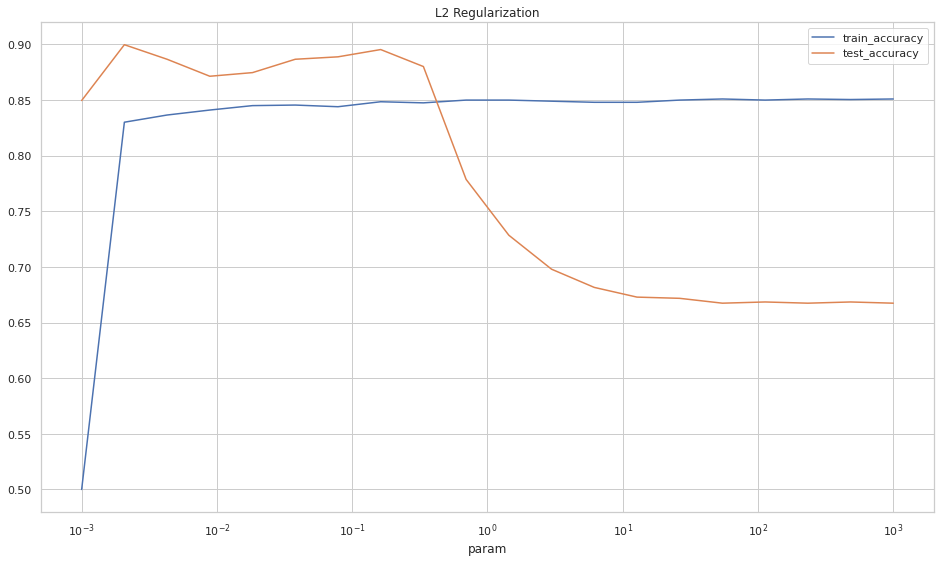

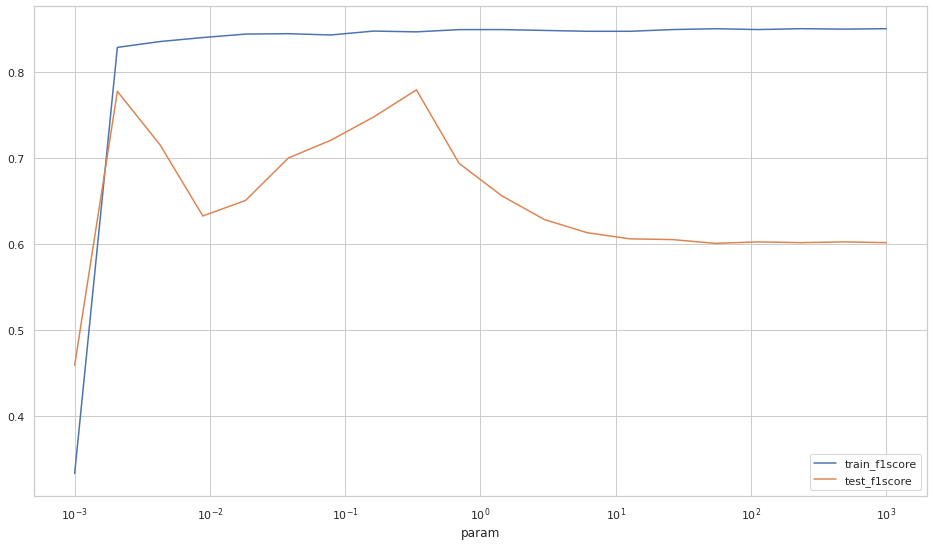

In [ ]:
C = np.logspace(-3,3, num = 20)
#C= [0.001, 0.01, 0.1, 1, 10, 100, 1000]

paraml1_df, paraml1f1_df, best_paraml1, best_logregl1 = hyperparameter(X_train_balanced, X_test, y_train_balanced, y_test,'l1',C)
paraml1_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True, title = "L2 Regularization")
paraml1f1_df.plot(x="param", y=["train_f1score", "test_f1score"], logx=True)
print("Best parameter for best f1 score is ",best_paraml1)

In [ ]:
logregCVScore(best_logregl1)

[[738  35]
 [ 67  78]]
f1 score is: 0.77
Precision score is: 0.804
Recall score is: 0.746
Fold 1: Accuracy: 88.889%
[[739  35]
 [ 67  77]]
f1 score is: 0.769
Precision score is: 0.802
Recall score is: 0.745
Fold 2: Accuracy: 88.889%
[[727  34]
 [ 67  90]]
f1 score is: 0.788
Precision score is: 0.821
Recall score is: 0.764
Fold 3: Accuracy: 88.998%
[[748  27]
 [ 58  84]]
f1 score is: 0.805
Precision score is: 0.842
Recall score is: 0.778
Fold 4: Accuracy: 90.731%
[[762  32]
 [ 69  54]]
f1 score is: 0.727
Precision score is: 0.772
Recall score is: 0.699
Fold 5: Accuracy: 88.986%
[[763  30]
 [ 56  68]]
f1 score is: 0.78
Precision score is: 0.813
Recall score is: 0.755
Fold 6: Accuracy: 90.622%
[[734  33]
 [ 71  79]]
f1 score is: 0.768
Precision score is: 0.809
Recall score is: 0.742
Fold 7: Accuracy: 88.659%
[[741  20]
 [ 75  81]]
f1 score is: 0.785
Precision score is: 0.855
Recall score is: 0.746
Fold 8: Accuracy: 89.64%
[[739  35]
 [ 59  84]]
f1 score is: 0.791
Precision score is: 0.816

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

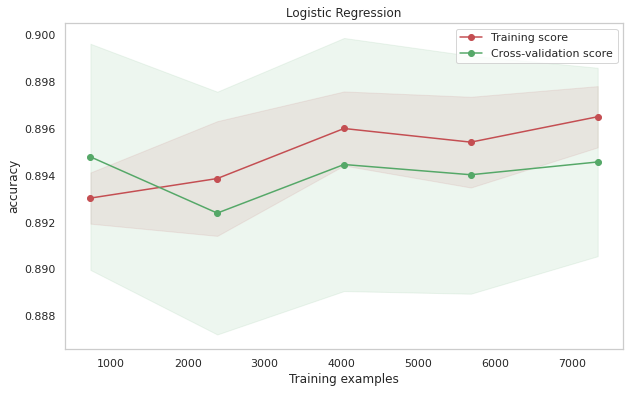

In [ ]:
plot_learning_curve(best_logregl1,'Logistic Regression', X, y, cv=5)

Although L2 and L1 regularization tuned logistic regression models have similar performances, the better model to use would be L2 regularization because is more stable in hyperparameter tuning (the hyperparameter tuning test curve appears convex) and performance (in the CV graphs, the swaths of green and red are tighter, having smaller confidence interals).

L1 Regularization, linear model

In [ ]:
# Generate several possible values for the regularization strength alpha (i.e. 1/C)
# Smaller values, stronger regularization, more coefficients will go to zero
#alphas = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
alphas = np.linspace(0.001,0.1)

In [ ]:
# NonZeroCoeff_L1: the number of non-zero coefficients for all alphas
# Model_Coeff_L1 : the values of all the coefficients for all alphas
Train_Error_L1 = np.zeros(shape=(len(alphas),1))
Test_Error_L1 = np.zeros(shape=(len(alphas),1))

Model_Coeff_L1  = np.zeros(shape=(X.shape[1], len(alphas)))
NonZeroCoeff_L1 = np.zeros(shape=(len(alphas),1))

In [ ]:
#Run Lasso Regression for alphas where alpha = 1/C

count = -1
for alpha in alphas:
    count += 1
    # instantiate a logistic regression model, and fit with X and y
    model_L1 = linear_model.Lasso(alpha=alpha, max_iter=2000)
    # Fit the model
    model_L1.fit(X_train, y_train)
    Train_Error_L1[count,0] = np.mean(abs(model_L1.predict(X_train) - y_train))
    Test_Error_L1[count,0]  = np.mean(abs(model_L1.predict(X_test) - y_test))
    Model_Coeff_L1[:,count] = model_L1.coef_
    NonZeroCoeff_L1[count,0] = X.shape[1] - (model_L1.coef_ == 0).sum()

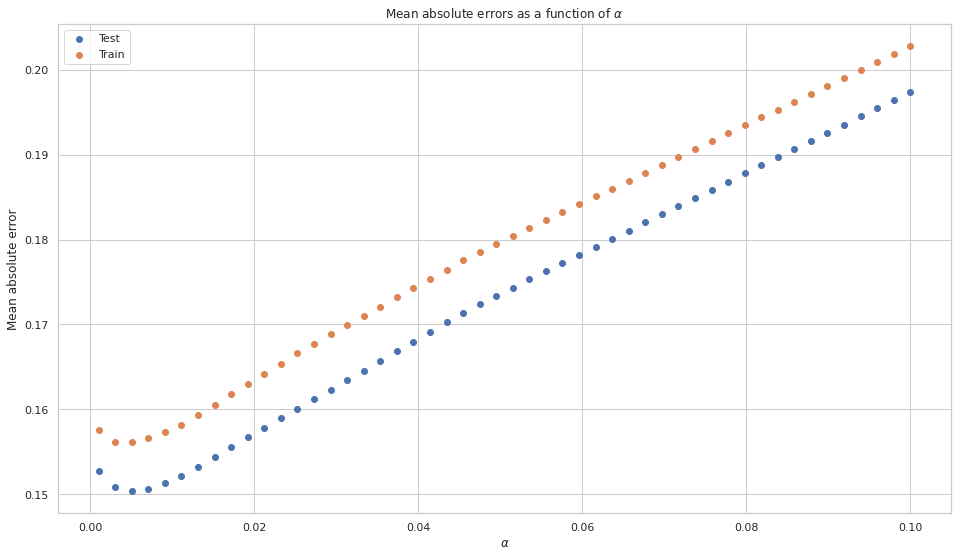

In [ ]:
plt.scatter(alphas, Test_Error_L1, label='Test')
plt.scatter(alphas, Train_Error_L1, label='Train')
plt.title(r'Mean absolute errors as a function of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean absolute error')
plt.legend()
plt.show()

In [ ]:
print('Test Set Mean Absolute Error:', round(Test_Error_L1.min(),2))

Test Set Mean Absolute Error: 0.15


No handles with labels found to put in legend.


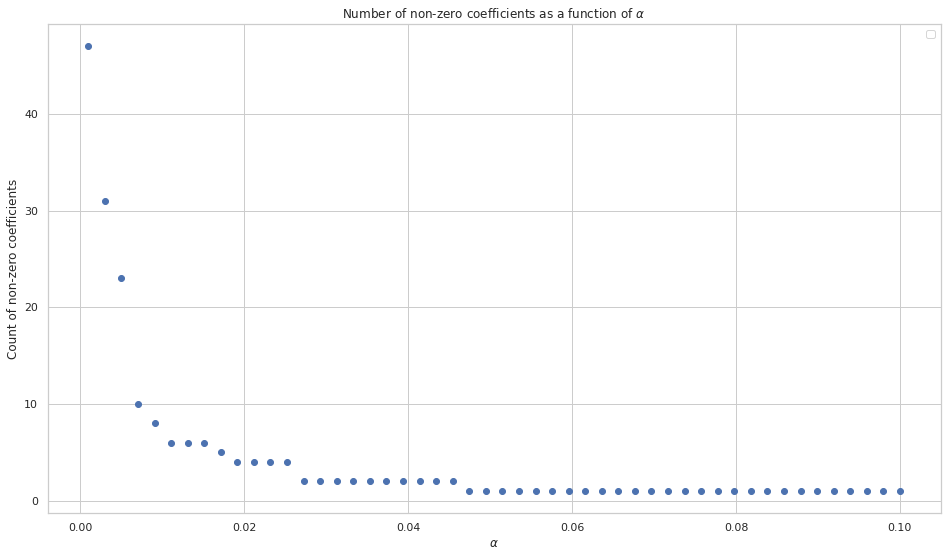

In [ ]:
plt.scatter(alphas, NonZeroCoeff_L1)
plt.legend()
plt.title(r'Number of non-zero coefficients as a function of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Count of non-zero coefficients')
plt.show()

In [ ]:
# Just setting cv=5 will NOT shuffle your data by default
from sklearn.model_selection import KFold
splitter = KFold(5, random_state=42, shuffle=True)

# instantiate a logistic regression model, and fit with X and y
alphas = np.logspace(-4, -1, 50)
model_LassoCV = linear_model.LassoCV(alphas=alphas, cv=splitter, max_iter=10000) # n_alphas=100, default alternative is irrelevant
# Fit the model
model_LassoCV.fit(X_train, y_train)

LassoCV(alphas=array([0.0001    , 0.00011514, 0.00013257, 0.00015264, 0.00017575,
       0.00020236, 0.000233  , 0.00026827, 0.00030888, 0.00035565,
       0.00040949, 0.00047149, 0.00054287, 0.00062506, 0.00071969,
       0.00082864, 0.0009541 , 0.00109854, 0.00126486, 0.00145635,
       0.00167683, 0.0019307 , 0.002223  , 0.00255955, 0.00294705,
       0.00339322, 0.00390694, 0.00449843, 0.00517947, 0.00596362,
       0.006866...
       0.01389495, 0.01599859, 0.0184207 , 0.02120951, 0.02442053,
       0.02811769, 0.03237458, 0.03727594, 0.04291934, 0.04941713,
       0.05689866, 0.06551286, 0.0754312 , 0.08685114, 0.1       ]),
        copy_X=True, cv=KFold(n_splits=5, random_state=42, shuffle=True),
        eps=0.001, fit_intercept=True, max_iter=10000, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
model_LassoCV.alpha_
X.shape[1] - (model_LassoCV.coef_ == 0).sum()
model_LassoCV.alphas_

array([0.1       , 0.08685114, 0.0754312 , 0.06551286, 0.05689866,
       0.04941713, 0.04291934, 0.03727594, 0.03237458, 0.02811769,
       0.02442053, 0.02120951, 0.0184207 , 0.01599859, 0.01389495,
       0.01206793, 0.01048113, 0.00910298, 0.00790604, 0.00686649,
       0.00596362, 0.00517947, 0.00449843, 0.00390694, 0.00339322,
       0.00294705, 0.00255955, 0.002223  , 0.0019307 , 0.00167683,
       0.00145635, 0.00126486, 0.00109854, 0.0009541 , 0.00082864,
       0.00071969, 0.00062506, 0.00054287, 0.00047149, 0.00040949,
       0.00035565, 0.00030888, 0.00026827, 0.000233  , 0.00020236,
       0.00017575, 0.00015264, 0.00013257, 0.00011514, 0.0001    ])

In [ ]:
np.mean(abs(model_LassoCV.predict(X_train) - y_train))

0.15648449078874066

In [ ]:
np.mean(abs(model_LassoCV.predict(X_test) - y_test))

0.15148998203829242

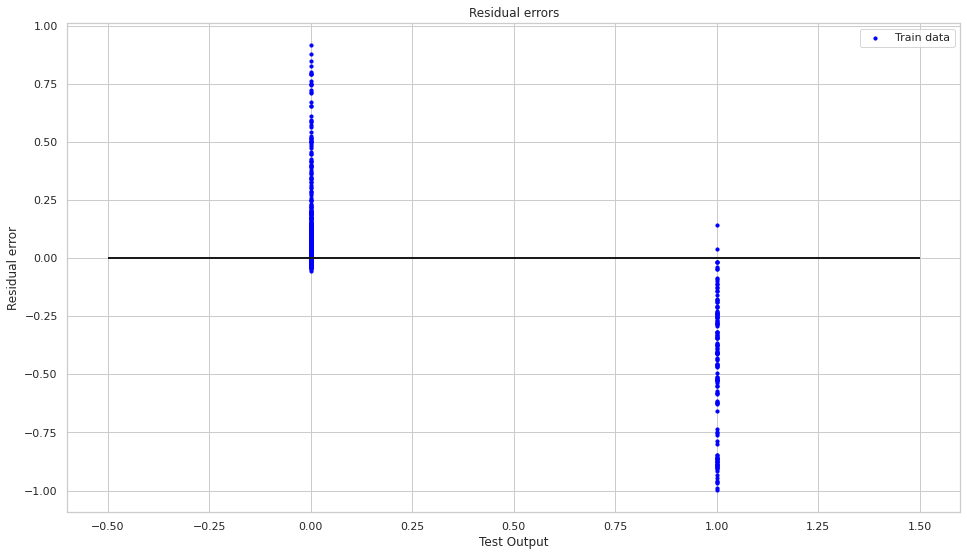

In [ ]:
error = model_LassoCV.predict(X_test) - y_test

plt.scatter(y_test, error, color = 'blue', s = 10, label = 'Train data')
plt.hlines(y=0, xmin=-0.5, xmax=1.5, linewidth=2)
plt.xlabel('Test Output')
plt.ylabel('Residual error')
plt.legend(loc = 'upper right')
plt.title('Residual errors')
plt.show()

For linear model, we see residual error, were we generally would like to see most of the datapoitns near the 0 line. However, it appears that it performs somewhat poorly for binary classification, so although it was interesting to see how L2 and L1 regularization for linear regression affects the model, test error and residual errors tell us both methods are not good for solving this particular problem statement.

####Logistic Regression Feature Importance

https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
predictors = X_train
selector = RFE(model, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [ ]:
order = selector.ranking_
order

array([14, 58, 33, 64,  9, 22,  4,  2,  1, 45, 29, 18,  8, 12, 19, 44, 43,
        6,  3, 20, 21,  7, 15, 69, 39, 67, 59, 23, 62, 68, 52, 49, 53, 35,
       55, 54, 66, 24, 31, 47, 26, 27, 28, 65, 61, 25, 40, 46, 42, 60, 70,
       32, 50, 72, 37, 17, 51, 41, 56, 63, 30, 71, 38, 36, 73, 11, 10,  5,
       34, 48, 16, 13, 57])

In [ ]:
feature_ranks=[]
feature_names=[]
num = 0
for i in order:
  feature_ranks.append(i)
  feature_names.append(X.columns[num])
  num += 1
    
featimp = zip(feature_names,feature_ranks)
sortedfeatimp = sorted(featimp, key = lambda x : x[1])
for name, value in enumerate(sortedfeatimp):
    print(name, value)

0 ('PageValues', 1)
1 ('ExitRates', 2)
2 ('Month_Nov', 3)
3 ('BounceRates', 4)
4 ('TrafficType_15', 5)
5 ('Month_May', 6)
6 ('VisitorType_New_Visitor', 7)
7 ('Month_Dec', 8)
8 ('ProductRelated', 9)
9 ('TrafficType_14', 10)
10 ('TrafficType_13', 11)
11 ('Month_Feb', 12)
12 ('TrafficType_19', 13)
13 ('Administrative', 14)
14 ('VisitorType_Returning_Visitor', 15)
15 ('TrafficType_18', 16)
16 ('TrafficType_3', 17)
17 ('Month_Aug', 18)
18 ('Month_Jul', 19)
19 ('Month_Oct', 20)
20 ('Month_Sep', 21)
21 ('ProductRelated_Duration', 22)
22 ('Region_5', 23)
23 ('OperatingSystem_6', 24)
24 ('Browser_6', 25)
25 ('Browser_1', 26)
26 ('Browser_2', 27)
27 ('Browser_3', 28)
28 ('Weekend', 29)
29 ('TrafficType_8', 30)
30 ('OperatingSystem_7', 31)
31 ('Browser_12', 32)
32 ('Informational', 33)
33 ('TrafficType_16', 34)
34 ('OperatingSystem_2', 35)
35 ('TrafficType_11', 36)
36 ('TrafficType_2', 37)
37 ('TrafficType_10', 38)
38 ('Region_2', 39)
39 ('Browser_7', 40)
40 ('TrafficType_5', 41)
41 ('Browser_9',

###Decision Tree

Three types of decision trees were created, a regular decision tree classifier, a Random Forest Classifier, and a XGBoost classifier. These are all shown below.

0.9138495092693566
[[752  27]
 [ 52  86]]


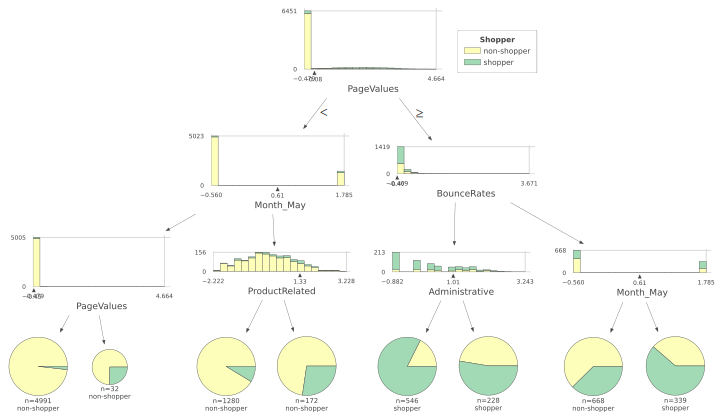

In [ ]:
#Many were tried but a depth of 3 had the best performance.
treeclass = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
treeclass.fit(X_train, y_train)

#Visualizing the Decision Tree
viz = dtreeviz(treeclass,
              X_train,
              y_train,
              target_name='Shopper',
              feature_names=dfClean.columns, 
              class_names=["non-shopper", "shopper"],
              fancy=True )  
predictions = treeclass.predict(X_test)
testmatrix = confusion_matrix(y_test, predictions)
print(treeclass.score(X_test, np.ravel(y_test)))
print(testmatrix)    

viz

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

#these were the best parameters for the Random Forest Classifier
clf = RandomForestClassifier(max_depth=12, n_estimators = 80,  random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
predictions = clf.predict(X_test)
testmatrix = confusion_matrix(y_test, predictions)
print(clf.score(X_test,y_test))
print(testmatrix)

[3.58e-02 4.39e-02 1.71e-02 2.27e-02 5.62e-02 6.75e-02 4.44e-02 6.96e-02
 4.29e-01 3.98e-03 7.38e-03 3.31e-03 5.75e-03 3.50e-04 3.37e-03 1.63e-03
 5.25e-03 7.27e-03 2.30e-02 4.09e-03 4.55e-03 1.12e-02 1.17e-02 7.66e-03
 5.02e-03 6.09e-03 4.30e-03 1.91e-03 3.23e-03 3.04e-03 2.83e-03 2.85e-03
 3.94e-03 6.44e-03 5.56e-03 2.45e-03 7.74e-05 2.53e-04 3.54e-04 5.76e-04
 4.50e-03 5.95e-03 4.42e-04 4.14e-03 3.33e-03 1.21e-03 7.46e-04 1.45e-03
 6.67e-09 1.56e-03 3.33e-05 5.20e-04 3.04e-04 4.49e-03 8.35e-03 3.80e-03
 3.57e-03 2.86e-03 2.49e-03 8.68e-04 3.79e-03 2.61e-04 2.64e-03 2.06e-03
 0.00e+00 1.87e-03 5.69e-08 4.77e-05 4.02e-04 0.00e+00 1.03e-07 0.00e+00
 2.24e-03]
0.910577971646674
[[764  15]
 [ 67  71]]


###Gradient Boost Classifier

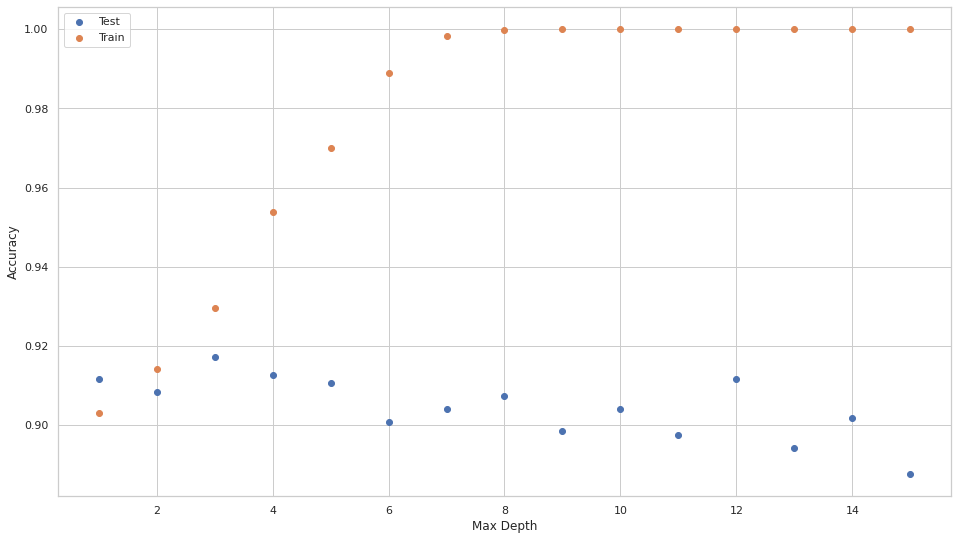

In [ ]:
n_estimators_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

Train_Error_GB = np.zeros(shape=(len(max_depth_list),1))
Test_Error_GB = np.zeros(shape=(len(max_depth_list),1))

#This is performing a more basic gridsearch parameter tuning and visualization
count = -1
for n_estimators in max_depth_list:
    count += 1  
    GB = GradientBoostingClassifier(n_estimators = 80, max_depth = n_estimators, learning_rate = 0.2, random_state = 0)
    GB.fit(X_train, np.ravel(y_train))
    Train_Error_GB[count,0] = GB.score(X_train, np.ravel(y_train))
    Test_Error_GB[count,0]  = GB.score(X_test, np.ravel(y_test))  

plt.scatter(max_depth_list, Test_Error_GB, label='Test')
plt.scatter(max_depth_list, Train_Error_GB, label='Train')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Feature Importance

For both the Random Forest and the Gradient Boosted models we wanted to visualize which features were most important. It was determined that the Google Analytics Variables were the most important.

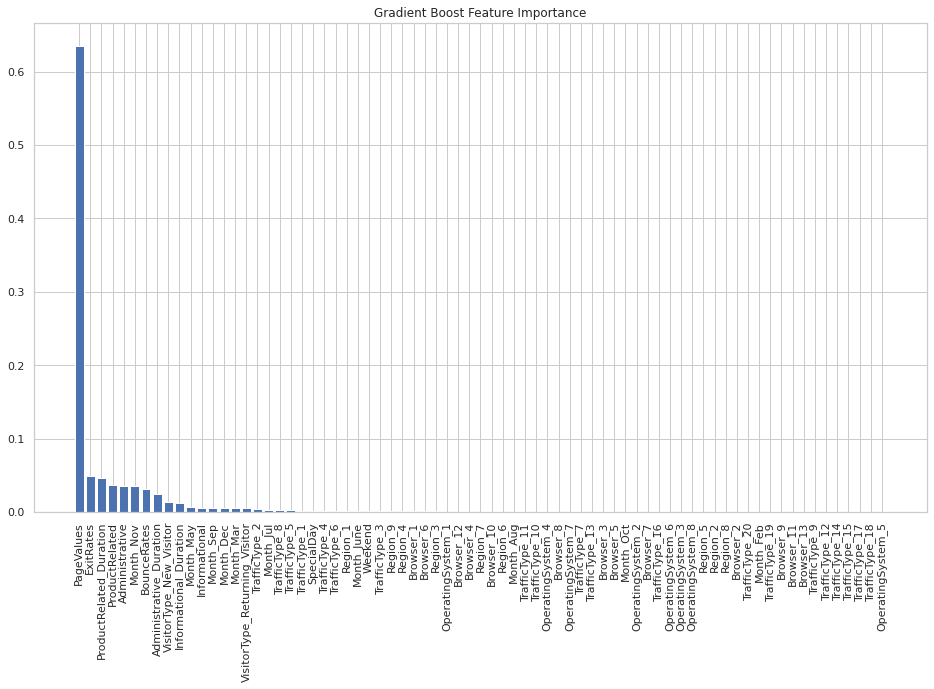

In [ ]:
# Calculate feature importances
importances = GB.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns [i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Gradient Boost Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

##Fine tuning tree-based methods
In order to optimize each model over many parameters a gridsearch was used. As can be seen below it took a very long while to complete.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
              "max_depth": [1, 2, 3, 4, 5, 6, 7],
              "max_features": [2, 4, 6, 8, 10],
#             "min_samples_split": [2, 3]}
               "min_samples_split": [2, 5, 10],
#              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False] }
grid_search = GridSearchCV(estimator = clf, param_grid=param_grid, n_jobs=-1, refit=True, verbose=1000, cv=5)
grid_search.fit(X_train, y_train)         

Streaming output truncated to the last 5000 lines.
Pickling array (shape=(8256,), dtype=int64).
Pickling array (shape=(6604,), dtype=int64).
Pickling array (shape=(1652,), dtype=int64).
[Parallel(n_jobs=-1)]: Done 13699 tasks      | elapsed: 50.5min
Memmapping (shape=(8256, 73), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_126_7689974073/126-140069589458392-a2b639e80a4c40328492c7a508833e31.pkl
Pickling array (shape=(8256,), dtype=int64).
Pickling array (shape=(6605,), dtype=int64).
Pickling array (shape=(1651,), dtype=int64).
[Parallel(n_jobs=-1)]: Done 13700 tasks      | elapsed: 50.5min
Memmapping (shape=(8256, 73), dtype=float64) to old file /dev/shm/joblib_memmapping_folder_126_7689974073/126-140069589458392-a2b639e80a4c40328492c7a508833e31.pkl
Pickling array (shape=(8256,), dtype=int64).
Pickling array (shape=(6605,), dtype=int64).
Pickling array (shape=(1651,), dtype=int64).
[Parallel(n_jobs=-1)]: Done 13701 tasks      | elapsed: 50.5min
Memmapping (shape=(8256, 7

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=15,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oo...=False, random_state=0,
                                         

In [ ]:
#Using the results of the gridsearch to test and display it's accuracy.
grid_search_model = RandomForestClassifier(max_depth=15, n_estimators=100, random_state=0, bootstrap = False, min_samples_split = 2)
grid_search_model.fit(X_train, y_train)
grid_search_model.score(X_test, y_test)

0.9094874591057798

##Models Evaluation and Comparison

###ROC

Logistic Regression

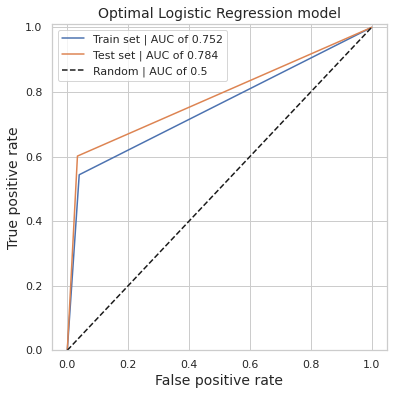

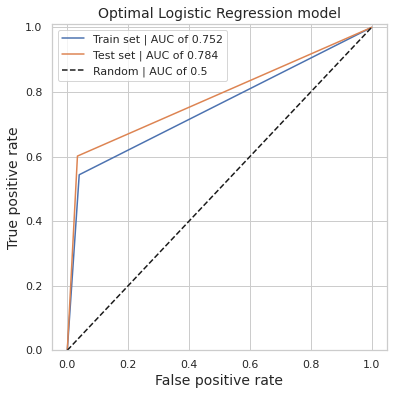

In [ ]:
def logregROC(model):
  # Scores for train set
  scores_train = best_logregl2.predict(X_train)
  # Scores for test set
  scores_test = best_logregl2.predict(X_test)

  # ============================ #
  # === [Train: ROC and AUC] === #
  # ============================ #
  # ROC Calc
  fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
  # AUC Calc
  auc_train = auc(fpr_train, tpr_train)
  # ============================ #
  # === [Test: ROC and AUC] === #
  # ============================ #
  # ROC Calc
  fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
  # AUC Calc
  auc_test = auc(fpr_test, tpr_test)

  # Plotting
  plt.figure(figsize=(6,6))
  plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
  plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
  plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
  plt.ylim([0,1.01])
  plt.title('Optimal Logistic Regression model', fontsize = 14)
  plt.ylabel('True positive rate', fontsize = 14)
  plt.xlabel('False positive rate', fontsize = 14)
  plt.legend()
  plt.show()
  return

logregROC(best_logregl1)
logregROC(best_logregl2)

In [ ]:

#ROC decision tree

# Scores for train set
scores_train = treeclass.predict_proba(X_train)[:, 1]
# Scores for test set
scores_test = treeclass.predict_proba(X_test)[:, 1]

# ============================ #
# === [Train: ROC and AUC] === #
# ============================ #
# ROC Calc
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# ============================ #
# === [Test: ROC and AUC] === #
# ============================ #
# ROC Calc
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
# AUC Calc
auc_test = auc(fpr_test, tpr_test)


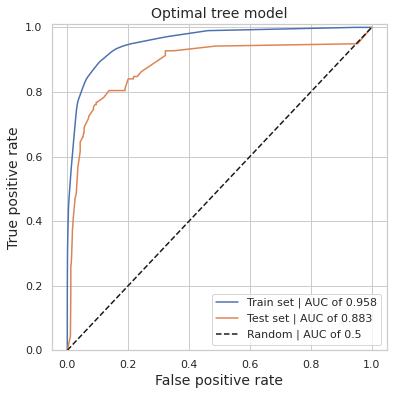

In [ ]:

# Plotting
plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.01])
plt.title('Optimal tree model', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('False positive rate', fontsize = 14)
plt.legend()
plt.show()


###Confusion matrix

A confusion matrix was created for every model generated. What was determined was that the regular decision tree classifier performed best even at a depth of 3 compared to the other models. It, along with the Logistic Regression model are shown below.

Logistic Regression

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 20)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    plt.ylim(-0.5, 1.5)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20)

# Compute confusion matrix
y_pred = best_logregl2.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = ['No Revenue','Revenue']

In [ ]:
def confusionMatrixMetrics(model):

  y_pred = model.predict(X_test)

  print("f1 score is:", round(f1_score(y_test, y_pred, average="macro"), 3))
  print("Precision score is:", round(precision_score(y_test, y_pred, average="macro"), 3))
  print("Recall score is:", round(recall_score(y_test, y_pred, average="macro"),3))  
  print("Accuracy is:", round(accuracy_score(y_test, y_pred),3)) 
  
  cnf_matrix = confusion_matrix(y_test, y_pred)

  # Plot non-normalized confusion matrix
  plt.figure(figsize=(8,8))
  plot_confusion_matrix(cnf_matrix, classes=class_names,
                        title='Confusion matrix, without normalization')
  plt.show() 

  # Plot normalized confusion matrix
  plt.figure(figsize=(8,8))
  plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                        title='Normalized confusion matrix')
  plt.show() 

  #Classification Report
  print(classification_report(y_test, y_pred, target_names=class_names))

f1 score is: 0.811
Precision score is: 0.847
Recall score is: 0.784
Accuracy is: 0.912
Confusion matrix, without normalization
[[753  26]
 [ 55  83]]


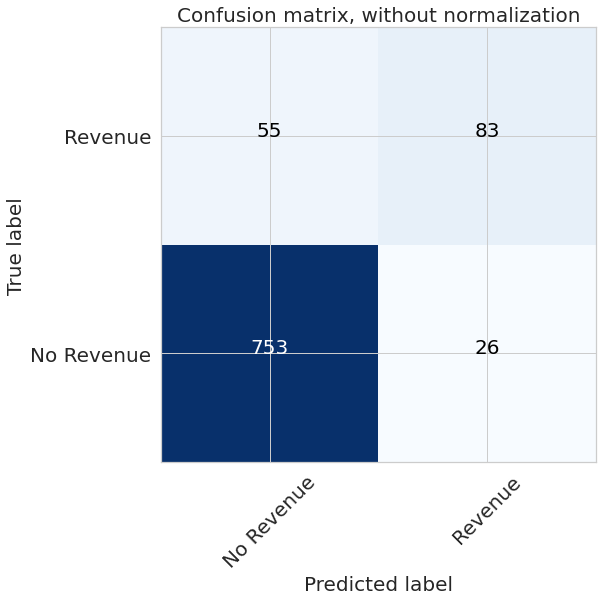

Normalized confusion matrix
[[0.97 0.03]
 [0.4  0.6 ]]


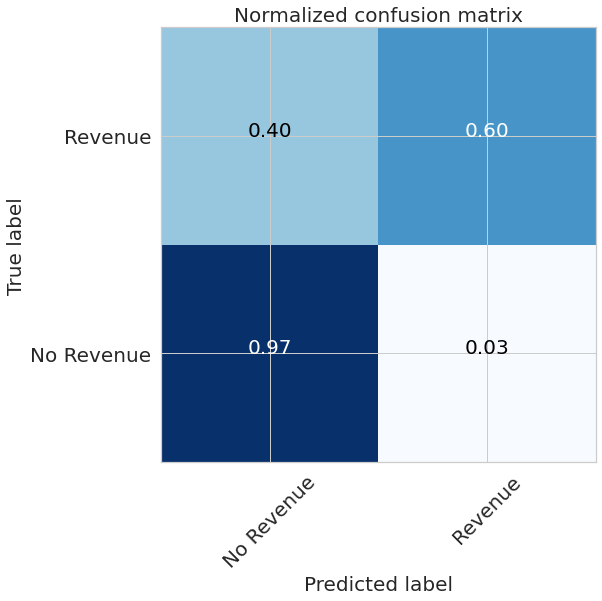

              precision    recall  f1-score   support

  No Revenue       0.93      0.97      0.95       779
     Revenue       0.76      0.60      0.67       138

    accuracy                           0.91       917
   macro avg       0.85      0.78      0.81       917
weighted avg       0.91      0.91      0.91       917



In [ ]:
confusionMatrixMetrics(best_logregl2)

f1 score is: 0.818
Precision score is: 0.848
Recall score is: 0.794
Accuracy is: 0.914
Confusion matrix, without normalization
[[752  27]
 [ 52  86]]


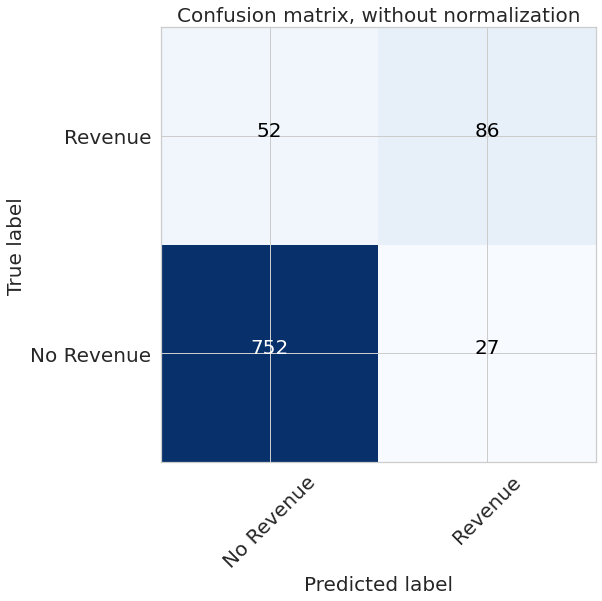

Normalized confusion matrix
[[0.97 0.03]
 [0.38 0.62]]


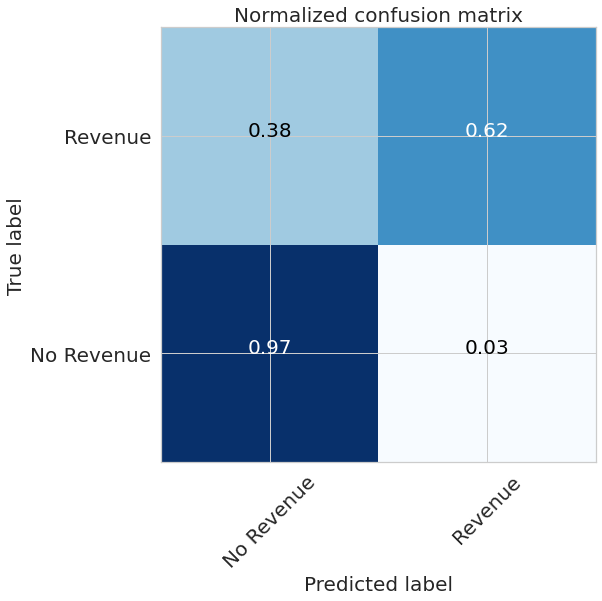

              precision    recall  f1-score   support

  No Revenue       0.94      0.97      0.95       779
     Revenue       0.76      0.62      0.69       138

    accuracy                           0.91       917
   macro avg       0.85      0.79      0.82       917
weighted avg       0.91      0.91      0.91       917



In [ ]:
confusionMatrixMetrics(treeclass)

f1 score is: 0.812
Precision score is: 0.82
Recall score is: 0.805
Accuracy is: 0.906


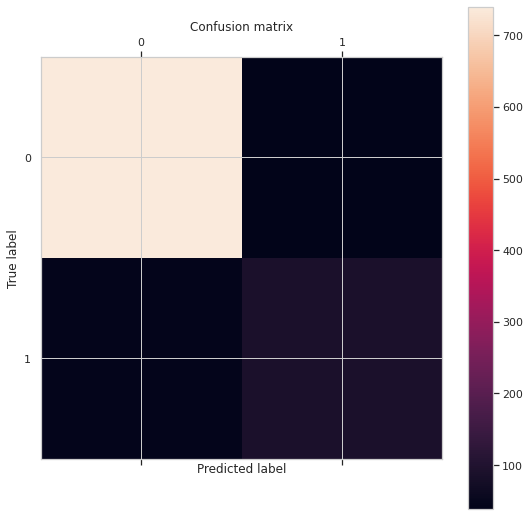

In [ ]:

y_pred = treeclass.predict(X_test)

print("f1 score is:", round(f1_score(y_test, y_pred, average="macro"), 3))
print("Precision score is:", round(precision_score(y_test, y_pred, average="macro"), 3))
print("Recall score is:", round(recall_score(y_test, y_pred, average="macro"),3))  
print("Accuracy is:", round(accuracy_score(y_test, y_pred),3)) 

cm = confusion_matrix(y_test, y_pred)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()  


Confusion matrix, without normalization
[[740  39]
 [ 47  91]]


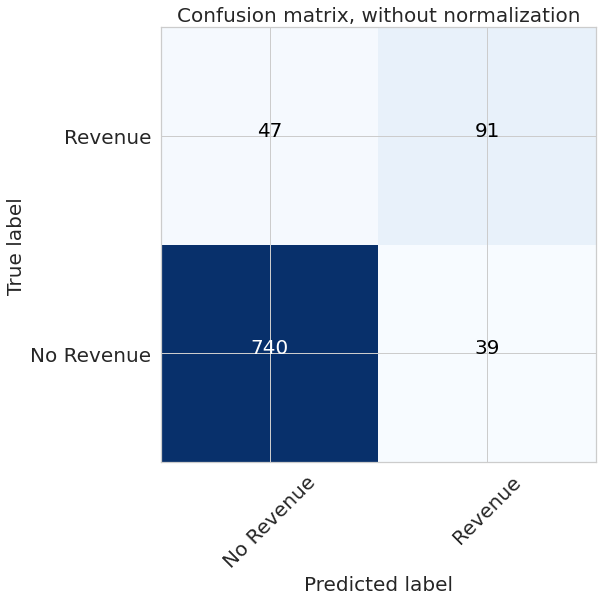

In [ ]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show() 



Normalized confusion matrix
[[0.95 0.05]
 [0.34 0.66]]


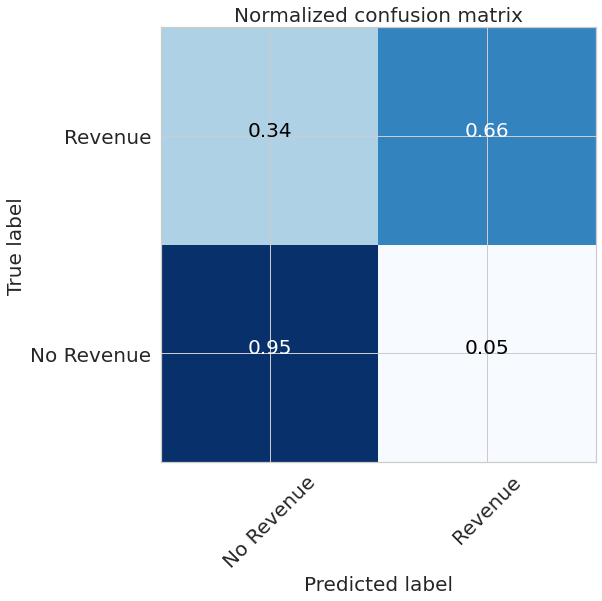

In [ ]:
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show() 

In [ ]:
#Classification Report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

  No Revenue       0.94      0.95      0.95       779
     Revenue       0.70      0.66      0.68       138

    accuracy                           0.91       917
   macro avg       0.82      0.80      0.81       917
weighted avg       0.90      0.91      0.91       917



###Implementation
To test the performance of each created model, we used the original test data (referred to as testX) split at the beginning. What we noticed was that every model that we created had a much worse performance than their initial test results, as can be seen below.

In [ ]:
test_pred = treeclass.predict(testX)
print(confusion_matrix(testY, test_pred))
print(classification_report(testY, test_pred, target_names=class_names))



[[1994  594]
 [ 283  187]]
              precision    recall  f1-score   support

  No Revenue       0.88      0.77      0.82      2588
     Revenue       0.24      0.40      0.30       470

    accuracy                           0.71      3058
   macro avg       0.56      0.58      0.56      3058
weighted avg       0.78      0.71      0.74      3058



For a further exercise, a Multi-Layer Perceptron model (basically, a neural network) model was tested. What was determined was that it worked much better than any other models with the deployment. Determining the appropriate depth of the network along with the number of estimators was challenging, and trial and error was used for a lot of it.

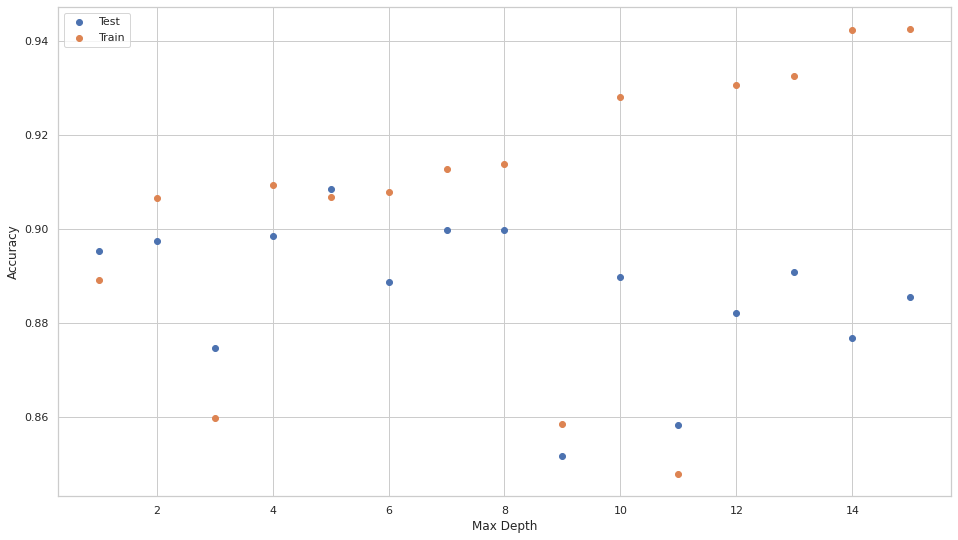

0.8796599084368869
[[2373  215]
 [ 153  317]]
              precision    recall  f1-score   support

  No Revenue       0.94      0.92      0.93      2588
     Revenue       0.60      0.67      0.63       470

    accuracy                           0.88      3058
   macro avg       0.77      0.80      0.78      3058
weighted avg       0.89      0.88      0.88      3058

[0 0 0 ... 0 0 1]


In [ ]:
from sklearn.neural_network import MLPClassifier

max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

Train_Error_nnet = np.zeros(shape=(len(max_depth_list),1))
Test_Error_nnet = np.zeros(shape=(len(max_depth_list),1))

count = -1
for n_estimators in max_depth_list:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    nnet = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(n_estimators, 4), random_state=1)
    # Fit the model
    nnet.fit(X_train, y_train)
    Train_Error_nnet[count,0] = nnet.score(X_train, np.ravel(y_train))
    Test_Error_nnet[count,0]  = nnet.score(X_test, np.ravel(y_test)) 

plt.scatter(max_depth_list, Test_Error_nnet, label='Test')
plt.scatter(max_depth_list, Train_Error_nnet, label='Train')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



nnet = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(5, 4), random_state=1)
nnet.fit(X_train,y_train)
test_pred = nnet.predict(testX)
print(nnet.score(testX, testY))
print(confusion_matrix(testY, test_pred))
print(classification_report(testY, test_pred, target_names=class_names))
print(test_pred)

This model performs relatively comparable to the other models generated.

f1 score is: 0.805
Precision score is: 0.836
Recall score is: 0.782
Accuracy is: 0.908
Confusion matrix, without normalization
[[750  29]
 [ 55  83]]


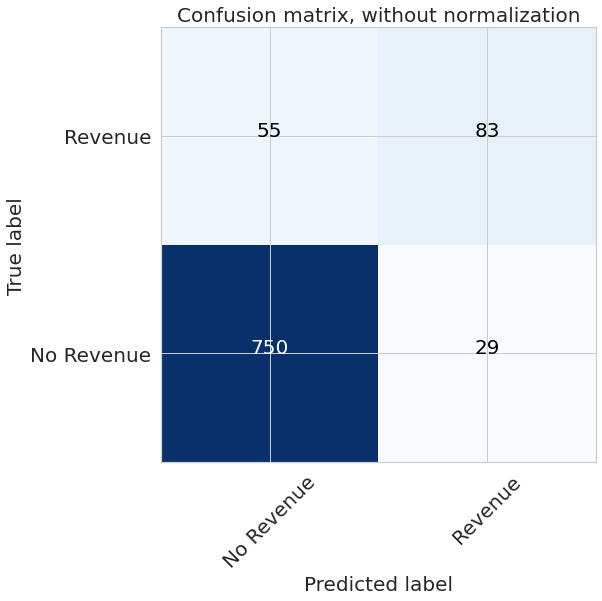

Normalized confusion matrix
[[0.96 0.04]
 [0.4  0.6 ]]


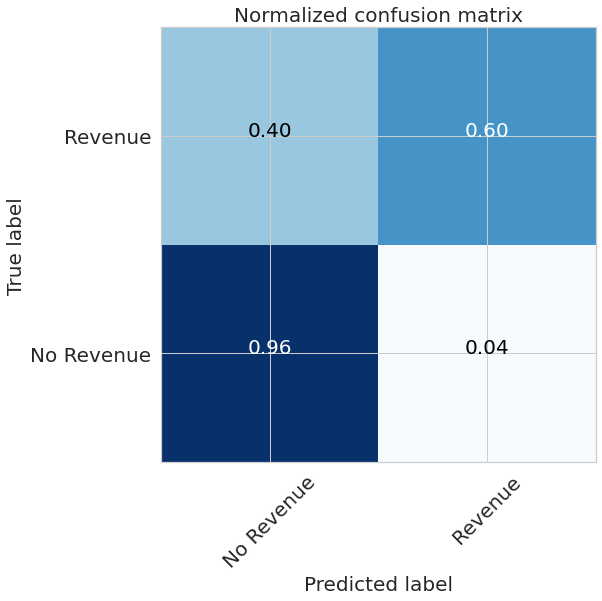

              precision    recall  f1-score   support

  No Revenue       0.93      0.96      0.95       779
     Revenue       0.74      0.60      0.66       138

    accuracy                           0.91       917
   macro avg       0.84      0.78      0.81       917
weighted avg       0.90      0.91      0.90       917



In [ ]:
confusionMatrixMetrics(nnet)
nnet = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(5, 4), random_state=1)
nnet.fit(X_train,y_train)
test_pred = nnet.predict(testX)

The actual testing of the data shows how it performs much better, achieving an f-score only marginally worse than it's test data.

Confusion matrix, without normalization
[[2373  153]
 [ 215  317]]ERROR! Session/line number was not unique in database. History logging moved to new session 64



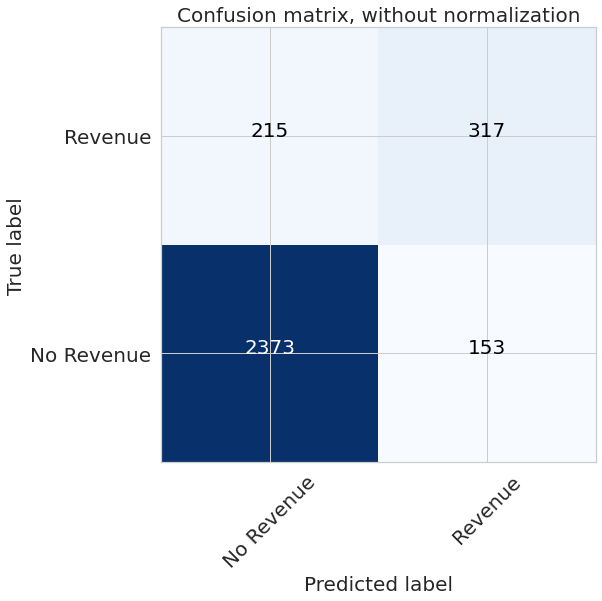

Normalized confusion matrix
[[0.94 0.06]
 [0.4  0.6 ]]


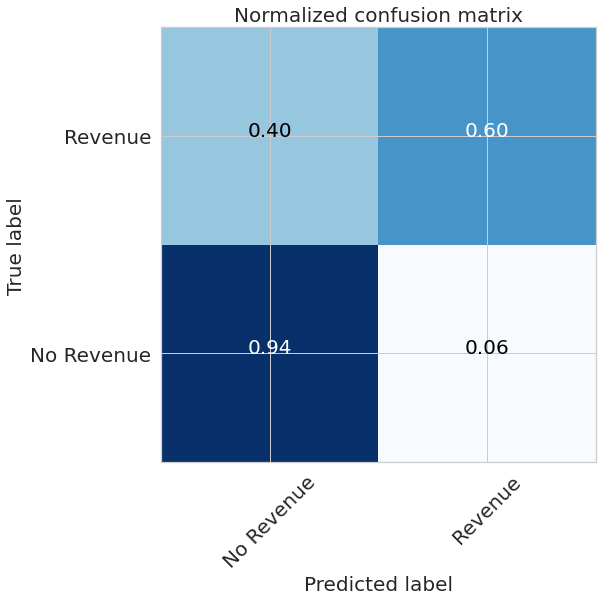

              precision    recall  f1-score   support

  No Revenue       0.94      0.95      0.95       779
     Revenue       0.70      0.66      0.68       138

    accuracy                           0.91       917
   macro avg       0.82      0.80      0.81       917
weighted avg       0.90      0.91      0.91       917



In [ ]:
 cnf_matrix = confusion_matrix(test_pred, testY)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show() 

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show() 

#Classification Report
print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
print("f1 score is:", round(f1_score(test_pred, testY, average="macro"), 3))
print("Accuracy is:", round(accuracy_score(test_pred, testY),3))

f1 score is: 0.78
Accuracy is: 0.88
